# installing kaggle dataset and importing it on Google colab

In [ ]:
# Install kaggle
!pip install -q kaggle

# This will prompt you to upload kaggle.json
from google.colab import files
print("Please upload your kaggle.json file:")
print("Get it from: https://www.kaggle.com/settings -> Create New API Token")
uploaded = files.upload()

# Setup kaggle credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

print("✓ Kaggle API configured successfully!")

Please upload your kaggle.json file:
Get it from: https://www.kaggle.com/settings -> Create New API Token


Saving kaggle.json to kaggle.json
✓ Kaggle API configured successfully!


# downloading Breast Utrasound Datasets

In [ ]:
import os
from datetime import datetime

In [ ]:
print(f"Started at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
# Create organized directory structure
os.makedirs('/content/data/raw', exist_ok=True)
# above is file location for it > content>data>raw

Started at: 2026-01-06 16:39:49



In [ ]:
# Dataset configurations
download_log = []
datasets = [
    {
        'kaggle_path': 'orvile/bus-bra-a-breast-ultrasound-dataset',
        'name': 'BUS-BRA',
        'description': 'BI-RADS classified breast ultrasound with masks'
    },
    {
        'kaggle_path': 'orvile/bus-uc-breast-ultrasound-dataset',
        'name': 'BUS-UC',
        'description': 'University of California breast ultrasound'
    },
    {
        'kaggle_path': 'orvile/hisbreast-breast-ultrasound-dataset',
        'name': 'HiSBreast',
        'description': 'High-resolution breast ultrasound dataset'
    },
    {
        'kaggle_path': 'jocelyndumlao/bus-synthetic-dataset',
        'name': 'BUS-Synthetic',
        'description': 'Synthetic breast ultrasound images'
    },
    {
        'kaggle_path': 'vuppalaadithyasairam/ultrasound-breast-images-for-breast-cancer',
        'name': 'Ultrasound-Breast-Cancer',
        'description': 'Large breast cancer ultrasound dataset'
    },
    {
        'kaggle_path': 'aryashah2k/breast-ultrasound-images-dataset',
        'name': 'Breast-Ultrasound-BUSI',
        'description': 'BUSI dataset with ground truth masks'
    }
]

In [ ]:
for i, dataset in enumerate(datasets, 1):
    print(f"\n{'─'*70}")
    print(f" Dataset {i}/{len(datasets)}: {dataset['name']}")
    print(f"   {dataset['description']}")
    print(f"{'─'*70}")

    download_path = f"/content/data/raw/{dataset['name']}"

    try:
        # Download and unzip
        !kaggle datasets download -d {dataset['kaggle_path']} -p {download_path} --unzip -q

        # Check if successful
        if os.path.exists(download_path) and len(os.listdir(download_path)) > 0:
            file_count = sum([len(files) for _, _, files in os.walk(download_path)])
            size_bytes = sum([os.path.getsize(os.path.join(r, f))
                            for r, _, files in os.walk(download_path)
                            for f in files])
            size_mb = size_bytes / (1024*1024)

            print(f"downloaded successfully")
            print(f"   Files: {file_count:,}")
            print(f"   Size: {size_mb:.1f} MB")

            download_log.append({
                'dataset': dataset['name'],
                'status': 'SUCCESS',
                'files': file_count,
                'size_mb': round(size_mb, 1)
            })
        else:
            print(f"WARNING: Download may have failed (empty directory)")
            download_log.append({
                'dataset': dataset['name'],
                'status': 'FAILED',
                'files': 0,
                'size_mb': 0
            })

    except Exception as e:
        print(f" ERROR: {str(e)}")
        download_log.append({
            'dataset': dataset['name'],
            'status': 'ERROR',
            'files': 0,
            'size_mb': 0
        })

# Summary
print("\n" + "="*70)
print(" IMP -- DOWNLOAD SUMMARY")
print("="*70)


──────────────────────────────────────────────────────────────────────
 Dataset 1/6: BUS-BRA
   BI-RADS classified breast ultrasound with masks
──────────────────────────────────────────────────────────────────────
Dataset URL: https://www.kaggle.com/datasets/orvile/bus-bra-a-breast-ultrasound-dataset
License(s): other
downloaded successfully
   Files: 5,627
   Size: 253.2 MB

──────────────────────────────────────────────────────────────────────
 Dataset 2/6: BUS-UC
   University of California breast ultrasound
──────────────────────────────────────────────────────────────────────
403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/datasets/metadata/orvile/bus-uc-breast-ultrasound-dataset

──────────────────────────────────────────────────────────────────────
 Dataset 3/6: HiSBreast
   High-resolution breast ultrasound dataset
──────────────────────────────────────────────────────────────────────
Dataset URL: https://www.kaggle.com/datasets/orvile/hisbreast-breast-ultr

In [ ]:
# importing necessary libraries  cheacking if any dataset is not downloaded
import pandas as pd
summary_df = pd.DataFrame(download_log)
print(summary_df.to_string(index=False))

                 dataset  status  files  size_mb
                 BUS-BRA SUCCESS   5627    253.2
                  BUS-UC  FAILED      0      0.0
               HiSBreast SUCCESS   2934   1211.0
           BUS-Synthetic SUCCESS   1000      9.7
Ultrasound-Breast-Cancer SUCCESS   9016    659.0
  Breast-Ultrasound-BUSI SUCCESS   1578    253.9


In [ ]:
total_files = summary_df['files'].sum()
print(f" Total Files: {total_files:,}")
total_size = summary_df['size_mb'].sum()
print(f" Total Size: {total_size:.1f} MB ({total_size/1024:.2f} GB)")
successful = len(summary_df[summary_df['status'] == 'SUCCESS'])
print(f"\n Successful: {successful}/{len(datasets)} datasets")
print(f" Completed at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

 Total Files: 20,155
 Total Size: 2386.8 MB (2.33 GB)

 Successful: 5/6 datasets
 Completed at: 2026-01-06 16:41:44


# saving downloaded dataset as log

In [ ]:
# Save download log
summary_df.to_csv('/content/data/download_log.csv', index=False)
print(f"\n✅ Download log saved: /content/data/download_log.csv")


✅ Download log saved: /content/data/download_log.csv


# EXPLORE DATASET STRUCTURES

In [ ]:
from pathlib import Path
import pandas as pd
from collections import defaultdict
# from here we will explore Dataset Structure about following details
#- Folder organization
#    - File types
#    - Potential class labels
#    - CSV metadata

In [ ]:
def analyze_dataset_structure(base_path, dataset_name):

    print(f"\n{'='*70}")
    print(f"📂 DATASET: {dataset_name}")
    print(f"{'='*70}")

    if not os.path.exists(base_path):
        print(f" error here Not found: {base_path}")
        return None

    # 1. Directory Tree (first 3 levels)
    print(f"\n📁 Directory Structure:")
    print("─" * 70)

    for root, dirs, files in os.walk(base_path):
        level = root.replace(base_path, '').count(os.sep)
        if level > 2:  # Limit depth
            continue

        indent = "  " * level
        folder_name = os.path.basename(root) or dataset_name
        print(f"{indent}{'└─' if level > 0 else ''}📁 {folder_name}/")

        # Show subdirectories
        if level < 2:
            sub_indent = "  " * (level + 1)
            for d in sorted(dirs)[:5]:
                print(f"{sub_indent}├─ {d}/")
            if len(dirs) > 5:
                print(f"{sub_indent}└─ ... {len(dirs)-5} more folders")

    # 2. File Analysis
    print(f"\n File Analysis:")
    print("─" * 70)

    file_types = defaultdict(int)
    image_extensions = {'.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.tif'}

    # Find potential class folders (folders containing images)
    class_candidates = {}

    for root, dirs, files in os.walk(base_path):
        for file in files:
            ext = Path(file).suffix.lower()
            file_types[ext] += 1

        # Check if this folder contains images
        image_files = [f for f in files if Path(f).suffix.lower() in image_extensions]
        if image_files:
            folder_name = os.path.basename(root)
            relative_path = os.path.relpath(root, base_path)

            if folder_name not in class_candidates:
                class_candidates[folder_name] = {
                    'path': relative_path,
                    'count': 0,
                    'samples': []
                }

            class_candidates[folder_name]['count'] += len(image_files)
            class_candidates[folder_name]['samples'].extend(image_files[:3])

    print(f"\nFile Types Found:")
    for ext, count in sorted(file_types.items(), key=lambda x: x[1], reverse=True)[:10]:
        file_type = {
            '.png': 'PNG Images',
            '.jpg': 'JPEG Images',
            '.jpeg': 'JPEG Images',
            '.csv': 'CSV Data',
            '.json': 'JSON Data',
            '.txt': 'Text Files',
            '.zip': 'Zip Archives'
        }.get(ext, ext.upper())
        print(f"  {file_type:20s} ({ext:8s}): {count:6,} files")

    # 3. Potential Class Labels
    print(f"\n🏷️  Potential Class Labels (folders with images):")
    print("─" * 70)

    if class_candidates:
        for class_name, info in sorted(class_candidates.items(),
                                      key=lambda x: x[1]['count'],
                                      reverse=True):
            print(f"\n  📌 '{class_name}'")
            print(f"     Location: {info['path']}")
            print(f"     Images: {info['count']:,}")
            print(f"     Samples: {info['samples'][:2]}")
    else:
        print("  ⚠️  No obvious class structure found")

    # 4. CSV Files (metadata)
    print(f"\n📋 Metadata Files (CSV/JSON):")
    print("─" * 70)

    csv_files = list(Path(base_path).rglob("*.csv"))
    json_files = list(Path(base_path).rglob("*.json"))

    if csv_files:
        for csv_file in csv_files:
            print(f"\n  📄 {csv_file.name}")
            print(f"     Path: {csv_file.relative_to(base_path)}")
            try:
                df = pd.read_csv(csv_file, nrows=3)
                print(f"     Shape: {pd.read_csv(csv_file).shape}")
                print(f"     Columns ({len(df.columns)}): {', '.join(df.columns.tolist()[:10])}")
                if len(df.columns) > 10:
                    print(f"                ... and {len(df.columns)-10} more")
                print(f"\n     Preview (first 2 rows):")
                print(df.head(2).to_string(index=False, max_colwidth=30))
            except Exception as e:
                print(f"     ⚠️  Could not read: {str(e)[:50]}")
    else:
        print("  No CSV files found")

    if json_files and len(json_files) <= 5:
        print(f"\n  Found {len(json_files)} JSON files")
        for json_file in json_files[:3]:
            print(f"    - {json_file.name}")

    # 5. Summary Statistics
    total_images = sum([info['count'] for info in class_candidates.values()])

    print(f"\n📈 Summary:")
    print("─" * 70)
    print(f"  Total Image Files: {total_images:,}")
    print(f"  Potential Classes: {len(class_candidates)}")
    print(f"  Metadata Files: {len(csv_files)} CSV, {len(json_files)} JSON")

    return {
        'dataset': dataset_name,
        'total_images': total_images,
        'classes': class_candidates,
        'csv_files': [str(c) for c in csv_files],
        'file_types': dict(file_types)
    }

In [ ]:
# now Analyze each dataset (skiping BUS-UC since it failed)
exploration_results = []

dataset_paths = {
    'BUS-BRA': '/content/data/raw/BUS-BRA',
    'HiSBreast': '/content/data/raw/HiSBreast',
    'BUS-Synthetic': '/content/data/raw/BUS-Synthetic',
    'Ultrasound-Breast-Cancer': '/content/data/raw/Ultrasound-Breast-Cancer',
    'Breast-Ultrasound-BUSI': '/content/data/raw/Breast-Ultrasound-BUSI'
}

In [ ]:
for name, path in dataset_paths.items():
    result = analyze_dataset_structure(path, name)
    if result:
        exploration_results.append(result)


📂 DATASET: BUS-BRA

📁 Directory Structure:
──────────────────────────────────────────────────────────────────────
📁 BUS-BRA/
  ├─ BUSBRA/
  ├─ busbra_birads/
  └─📁 BUSBRA/
    ├─ BUSBRA/
    └─📁 BUSBRA/
  └─📁 busbra_birads/
    ├─ busbra_birads/
    └─📁 busbra_birads/

 File Analysis:
──────────────────────────────────────────────────────────────────────

File Types Found:
  PNG Images           (.png    ):  5,625 files
  CSV Data             (.csv    ):      1 files
  Text Files           (.txt    ):      1 files

🏷️  Potential Class Labels (folders with images):
──────────────────────────────────────────────────────────────────────

  📌 'Images'
     Location: BUSBRA/BUSBRA/Images
     Images: 1,875
     Samples: ['bus_0986-r.png', 'bus_0528-r.png']

  📌 'Masks'
     Location: BUSBRA/BUSBRA/Masks
     Images: 1,875
     Samples: ['mask_0973-l.png', 'mask_0413-l.png']

  📌 '4'
     Location: busbra_birads/busbra_birads/4
     Images: 693
     Samples: ['bus_0940-s.png', 'bus_0951-r.p

In [ ]:
# Overall Summary
summary_data = []
for result in exploration_results:
    summary_data.append({
        'Dataset': result['dataset'],
        'Images': result['total_images'],
        'Classes': len(result['classes']),
        'Has CSV': 'Yes' if result['csv_files'] else 'No'
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

                 Dataset  Images  Classes Has CSV
                 BUS-BRA    5625        6     Yes
               HiSBreast     972        1     Yes
           BUS-Synthetic    1000        2      No
Ultrasound-Breast-Cancer    9016        2      No
  Breast-Ultrasound-BUSI    1578        3      No


In [ ]:
total_images = summary_df['Images'].sum()
print(f"\n🎯 Total Images Across All Datasets: {total_images:,}")


🎯 Total Images Across All Datasets: 18,191


In [ ]:
# Saving exploration results
summary_df.to_csv('/content/data/exploration_summary.csv', index=False)
print(f"\n✅ Exploration summary saved: /content/data/exploration_summary.csv")


✅ Exploration summary saved: /content/data/exploration_summary.csv


# Detailed exploration of data with help of visuals

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import numpy as np

In [ ]:
# 3.1: Investigate BUS-BRA (has CSV but only 1 class detected)
print("📊 INVESTIGATING: BUS-BRA")
busbra_path = '/content/data/raw/BUS-BRA'

# Find the CSV file
csv_files = list(Path(busbra_path).rglob("*.csv"))
print(f"\n📋 Found {len(csv_files)} CSV file(s):")

for csv_file in csv_files:
    print(f"\n📄 {csv_file.name}")
    print(f"   Path: {csv_file}")

    try:
        df = pd.read_csv(csv_file)
        print(f"\n   ✅ Successfully loaded!")
        print(f"   Shape: {df.shape} (rows, columns)")
        print(f"\n   Columns: {list(df.columns)}")

        # Check for label/class columns
        potential_label_cols = ['label', 'class', 'diagnosis', 'pathology',
                               'category', 'type', 'BIRADS', 'Pathology']

        for col in df.columns:
            if col in potential_label_cols or 'label' in col.lower() or 'class' in col.lower():
                print(f"\n   🏷️  Label column found: '{col}'")
                print(f"   Unique values: {df[col].unique()}")
                print(f"   Value counts:")
                print(df[col].value_counts().to_string())

        # Show first few rows
        print(f"\n   📊 First 3 rows:")
        print(df.head(3).to_string(index=False, max_colwidth=30))

    except Exception as e:
        print(f"   ❌ Error reading CSV: {e}")

# Check the actual image folders
print(f"\n📁 Exploring BUS-BRA folder structure in detail:")
for root, dirs, files in os.walk(busbra_path):
    img_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if img_files:
        print(f"\n   Location: {os.path.relpath(root, busbra_path)}")
        print(f"   Images: {len(img_files)}")
        print(f"   Sample: {img_files[:3]}")

📊 INVESTIGATING: BUS-BRA

📋 Found 1 CSV file(s):

📄 bus_data.csv
   Path: /content/data/raw/BUS-BRA/BUSBRA/BUSBRA/bus_data.csv

   ✅ Successfully loaded!
   Shape: (1875, 16) (rows, columns)

   Columns: ['ID', 'Case', 'Histology', 'Pathology', 'BIRADS', 'Device', 'Width', 'Height', 'Side', 'HOB', 'K5B', 'K10B', 'HOP', 'K5P', 'K10P', 'BBOX']

   🏷️  Label column found: 'Pathology'
   Unique values: ['malignant' 'benign']
   Value counts:
Pathology
benign       1268
malignant     607

   🏷️  Label column found: 'BIRADS'
   Unique values: [4 2 5 3]
   Value counts:
BIRADS
4    693
2    562
3    463
5    157

   📊 First 3 rows:
        ID  Case                 Histology Pathology  BIRADS               Device  Width  Height  Side  HOB  K5B  K10B  HOP  K5P  K10P            BBOX
bus_0001-l     1 invasive ductal carcinoma malignant       4 GE Logiq 7 @10-14MHz    274     353  left    2    3     3    1    3     9  [91,24,103,79]
bus_0001-r     1 invasive ductal carcinoma malignant       4 GE L

In [ ]:
# 3.2: Investigate HiSBreast (has CSV)
print("📊 INVESTIGATING: HiSBreast")

hisbreast_path = '/content/data/raw/HiSBreast'

csv_files = list(Path(hisbreast_path).rglob("*.csv"))
print(f"\n📋 Found {len(csv_files)} CSV file(s):")

for csv_file in csv_files:
    print(f"\n📄 {csv_file.name}")

    try:
        # Try different encodings
        for encoding in ['utf-8', 'latin-1', 'iso-8859-1', 'cp1252']:
            try:
                df = pd.read_csv(csv_file, encoding=encoding)
                print(f"   ✅ Loaded with encoding: {encoding}")
                print(f"   Shape: {df.shape}")
                print(f"   Columns: {list(df.columns)}")

                # Look for diagnosis/label info
                print(f"\n   📊 First 5 rows:")
                print(df.head(5).to_string(index=False, max_colwidth=40))
                break
            except:
                continue
    except Exception as e:
        print(f"   ❌ Could not read: {e}")

# Check for other metadata files
json_files = list(Path(hisbreast_path).rglob("*.json"))
txt_files = list(Path(hisbreast_path).rglob("*.txt"))

if json_files:
    print(f"\n📋 Found {len(json_files)} JSON files")
    # Sample one
    if len(json_files) > 0:
        sample_json = json_files[0]
        print(f"\n   Sample JSON: {sample_json.name}")
        try:
            import json
            with open(sample_json, 'r') as f:
                data = json.load(f)
            print(f"   Keys: {list(data.keys()) if isinstance(data, dict) else 'List data'}")
            print(f"   Sample content: {str(data)[:200]}...")
        except Exception as e:
            print(f"   Could not parse: {e}")

📊 INVESTIGATING: HiSBreast

📋 Found 2 CSV file(s):

📄 his_breast.csv
   ✅ Loaded with encoding: utf-8
   Shape: (5, 3)
   Columns: ['Parent Directory', 'Subdirectory/File', 'File Count']

   📊 First 5 rows:
Parent Directory       Subdirectory/File  File Count
       HiSBreast            descriptions         972
       HiSBreast               diagnoses         972
       HiSBreast                  images         972
       HiSBreast                    json          16
       HiSBreast hisbreast_anotation.csv           1

📄 hisbreast_anotation.csv
   ✅ Loaded with encoding: latin-1
   Shape: (973, 5)
   Columns: ['Column1', 'Column2', 'Column3', 'Column4', 'Column5']

   📊 First 5 rows:
    Column1                                  Column2           Column3                                  Column4           Column5
  file_name                      text_description_vn text_diagnosis_vn                      text_description_en text_diagnosis_en
image_0.png u v£ tr i giai ?o?n ho?i t? . theo

# VISUALIZE SAMPLES FROM EACH DATASET

In [ ]:
# 3.3: VISUALIZE SAMPLES FROM EACH DATASET
print("🖼️  VISUALIZING SAMPLE IMAGES")

def get_sample_images(dataset_path, dataset_name, n_samples=6):
    """Get random sample images from a dataset"""
    image_extensions = {'.png', '.jpg', '.jpeg'}
    all_images = []

    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if Path(file).suffix.lower() in image_extensions:
                # Skip mask files
                if '_mask' not in file.lower():
                    all_images.append(os.path.join(root, file))

    if len(all_images) > 0:
        samples = random.sample(all_images, min(n_samples, len(all_images)))
        return samples
    return []

# Create visualization
fig = plt.figure(figsize=(20, 16))
fig.suptitle('Sample Images from Each Dataset', fontsize=18, fontweight='bold', y=0.995)

datasets_to_viz = {
    'BUS-BRA': '/content/data/raw/BUS-BRA',
    'HiSBreast': '/content/data/raw/HiSBreast',
    'BUS-Synthetic': '/content/data/raw/BUS-Synthetic',
    'Ultrasound-Breast-Cancer': '/content/data/raw/Ultrasound-Breast-Cancer',
    'Breast-Ultrasound-BUSI': '/content/data/raw/Breast-Ultrasound-BUSI'
}

🖼️  VISUALIZING SAMPLE IMAGES


<Figure size 2000x1600 with 0 Axes>

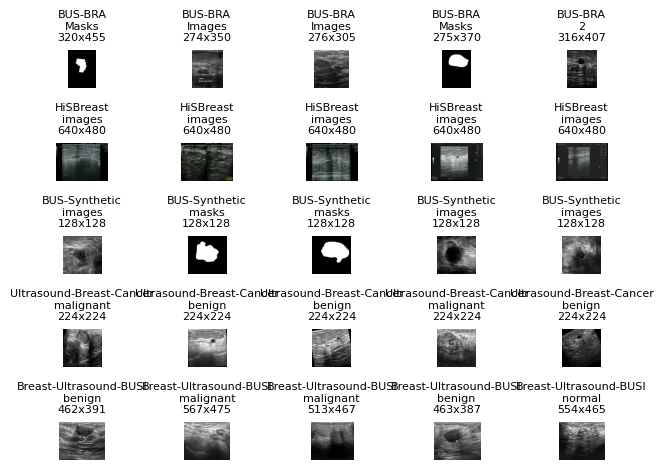


✅ Visualization saved: /content/data/dataset_visual_samples.png


In [ ]:
row = 0
for dataset_name, dataset_path in datasets_to_viz.items():
    samples = get_sample_images(dataset_path, dataset_name, n_samples=5)

    if samples:
        for col, img_path in enumerate(samples):
            try:
                img = Image.open(img_path)

                # Convert to numpy for display
                img_array = np.array(img)

                ax = plt.subplot(5, 5, row * 5 + col + 1)

                # Display grayscale if needed
                if len(img_array.shape) == 2:
                    ax.imshow(img_array, cmap='gray')
                else:
                    ax.imshow(img_array)

                # Get label from folder name
                folder_name = os.path.basename(os.path.dirname(img_path))
                ax.set_title(f"{dataset_name}\n{folder_name}\n{img.size[0]}x{img.size[1]}",
                           fontsize=8)
                ax.axis('off')

            except Exception as e:
                print(f"Error loading {img_path}: {e}")

    row += 1

plt.tight_layout()
plt.savefig('/content/data/dataset_visual_samples.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ Visualization saved: /content/data/dataset_visual_samples.png")



In [ ]:
# 3.4: SUMMARY OF FINDINGS

print("\n" + "="*70)
print("📋 INVESTIGATION SUMMARY")
print("="*70)

findings = """
Based on the investigation:

✅ CLEAR DATASETS (Ready to use):
   • Ultrasound-Breast-Cancer: 8,877 images (benign/malignant)
   • Breast-Ultrasound-BUSI: 1,577 images (benign/malignant/normal)

⚠️  NEEDS LABEL MAPPING:
   • BUS-BRA: Check CSV for pathology/BIRADS labels
   • HiSBreast: Check CSV/JSON for diagnosis labels

⏭️  SKIP (No clear labels):
   • BUS-Synthetic: Synthetic data without diagnosis labels
"""

print(findings)


📋 INVESTIGATION SUMMARY

Based on the investigation:

✅ CLEAR DATASETS (Ready to use):
   • Ultrasound-Breast-Cancer: 8,877 images (benign/malignant)
   • Breast-Ultrasound-BUSI: 1,577 images (benign/malignant/normal)

⚠️  NEEDS LABEL MAPPING:
   • BUS-BRA: Check CSV for pathology/BIRADS labels
   • HiSBreast: Check CSV/JSON for diagnosis labels

⏭️  SKIP (No clear labels):
   • BUS-Synthetic: Synthetic data without diagnosis labels



# Image Property Analysis (EDA)

In [ ]:
# STEP 4: IMAGE PROPERTIES ANALYSIS (EDA)
# Purpose: Understand image characteristics for preprocessing

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import random
print("🔍 STEP 4: IMAGE PROPERTIES ANALYSIS")

🔍 STEP 4: IMAGE PROPERTIES ANALYSIS


In [ ]:
# We'll analyze the two main datasets
datasets_to_analyze = {
    'Ultrasound-Breast-Cancer': '/content/data/raw/Ultrasound-Breast-Cancer',
    'Breast-Ultrasound-BUSI': '/content/data/raw/Breast-Ultrasound-BUSI'
}
# Collect all image paths (skip masks)
all_image_paths = []
dataset_labels = []

In [ ]:
for dataset_name, dataset_path in datasets_to_analyze.items():
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                # Skip mask files
                if '_mask' not in file.lower():
                    full_path = os.path.join(root, file)
                    all_image_paths.append(full_path)

                    # Extract label from folder name
                    folder_name = os.path.basename(root)
                    dataset_labels.append({
                        'path': full_path,
                        'dataset': dataset_name,
                        'label': folder_name
                    })

print(f"\n📊 Found {len(all_image_paths):,} images (excluding masks)")


📊 Found 9,796 images (excluding masks)


In [ ]:
# Sample for analysis (analyze 1000 random images for speed)
sample_size = min(1000, len(all_image_paths))
sampled_paths = random.sample(all_image_paths, sample_size)
print(f"📊 Analyzing {sample_size} sample images...")

📊 Analyzing 1000 sample images...


In [ ]:
# Collected properties are defined
properties = {
    'widths': [],
    'heights': [],
    'aspect_ratios': [],
    'sizes': [],
    'modes': [],
    'mean_intensities': [],
    'std_intensities': [],
    'min_intensities': [],
    'max_intensities': [],
    'file_sizes_kb': []
}

In [ ]:
for i, img_path in enumerate(sampled_paths):
    if i % 100 == 0:
        print(".", end="", flush=True)

    try:
        img = Image.open(img_path)
        w, h = img.size

        properties['widths'].append(w)
        properties['heights'].append(h)
        properties['aspect_ratios'].append(w/h)
        properties['sizes'].append((w, h))
        properties['modes'].append(img.mode)
        properties['file_sizes_kb'].append(os.path.getsize(img_path) / 1024)

        # Convert to grayscale for intensity analysis
        if img.mode == 'RGB' or img.mode == 'RGBA':
            img_gray = img.convert('L')
        else:
            img_gray = img

        img_array = np.array(img_gray)
        properties['mean_intensities'].append(img_array.mean())
        properties['std_intensities'].append(img_array.std())
        properties['min_intensities'].append(img_array.min())
        properties['max_intensities'].append(img_array.max())

    except Exception as e:
        pass

print(" Done!\n")

.......... Done!



# STATISTICS SUMMARY

In [ ]:
# STATISTICS SUMMARY

print("📊 IMAGE STATISTICS SUMMARY")

print(f"\n📏 IMAGE DIMENSIONS:")

print(f"Width  - Min: {min(properties['widths']):4d}px | "
      f"Max: {max(properties['widths']):4d}px | "
      f"Mean: {np.mean(properties['widths']):6.1f}px | "
      f"Median: {np.median(properties['widths']):6.1f}px")

📊 IMAGE STATISTICS SUMMARY

📏 IMAGE DIMENSIONS:
Width  - Min:  224px | Max:  886px | Mean:  263.3px | Median:  224.0px


In [ ]:
print(f"Height - Min: {min(properties['heights']):4d}px | "
      f"Max: {max(properties['heights']):4d}px | "
      f"Mean: {np.mean(properties['heights']):6.1f}px | "
      f"Median: {np.median(properties['heights']):6.1f}px")

Height - Min:  224px | Max:  719px | Mean:  251.2px | Median:  224.0px


In [ ]:
print(f"\nAspect Ratio (W/H):")
print(f"  Min: {min(properties['aspect_ratios']):.2f} | "
      f"Max: {max(properties['aspect_ratios']):.2f} | "
      f"Mean: {np.mean(properties['aspect_ratios']):.2f}")


Aspect Ratio (W/H):
  Min: 0.90 | Max: 2.05 | Mean: 1.02


In [ ]:
print(f"\n📐 MOST COMMON IMAGE SIZES:")
print("─" * 70)
size_counts = Counter(properties['sizes'])
for i, (size, count) in enumerate(size_counts.most_common(10), 1):
    percentage = (count / len(properties['sizes'])) * 100
    print(f"  {i:2d}. {size[0]:4d}x{size[1]:4d} : {count:4d} images ({percentage:5.1f}%)")


📐 MOST COMMON IMAGE SIZES:
──────────────────────────────────────────────────────────────────────
   1.  224x 224 :  857 images ( 85.7%)
   2.  227x 227 :   49 images (  4.9%)
   3.  777x 578 :    2 images (  0.2%)
   4.  552x 492 :    2 images (  0.2%)
   5.  551x 473 :    1 images (  0.1%)
   6.  558x 471 :    1 images (  0.1%)
   7.  545x 463 :    1 images (  0.1%)
   8.  750x 572 :    1 images (  0.1%)
   9.  563x 468 :    1 images (  0.1%)
  10.  770x 589 :    1 images (  0.1%)


In [ ]:
print(f"\n🎨 COLOR MODES:")
print("─" * 70)
mode_counts = Counter(properties['modes'])
for mode, count in mode_counts.items():
    percentage = (count / len(properties['modes'])) * 100
    mode_name = {
        'L': 'Grayscale',
        'RGB': 'RGB Color',
        'RGBA': 'RGBA Color',
        'P': 'Palette',
        '1': 'Binary'
    }.get(mode, mode)
    print(f"  {mode_name:15s} ({mode:4s}): {count:4d} images ({percentage:5.1f}%)")


🎨 COLOR MODES:
──────────────────────────────────────────────────────────────────────
  RGB Color       (RGB ): 1000 images (100.0%)


In [ ]:
print(f"\n💡 PIXEL INTENSITY (0-255 scale):")
print("─" * 70)
print(f"Mean Intensity - Min: {min(properties['mean_intensities']):6.1f} | "
      f"Max: {max(properties['mean_intensities']):6.1f} | "
      f"Avg: {np.mean(properties['mean_intensities']):6.1f}")
print(f"Std Deviation  - Min: {min(properties['std_intensities']):6.1f} | "
      f"Max: {max(properties['std_intensities']):6.1f} | "
      f"Avg: {np.mean(properties['std_intensities']):6.1f}")


💡 PIXEL INTENSITY (0-255 scale):
──────────────────────────────────────────────────────────────────────
Mean Intensity - Min:   26.5 | Max:  145.4 | Avg:   81.2
Std Deviation  - Min:   31.0 | Max:   91.5 | Avg:   57.2


In [ ]:
print(f"\n💾 FILE SIZES:")
print("─" * 70)
print(f"Min: {min(properties['file_sizes_kb']):6.1f} KB | "
      f"Max: {max(properties['file_sizes_kb']):6.1f} KB | "
      f"Mean: {np.mean(properties['file_sizes_kb']):6.1f} KB | "
      f"Median: {np.median(properties['file_sizes_kb']):6.1f} KB")


💾 FILE SIZES:
──────────────────────────────────────────────────────────────────────
Min:    9.5 KB | Max:  550.7 KB | Mean:  101.1 KB | Median:   74.7 KB


# VISUALIZATIONS

📊 Generating a combined visualization of image properties...


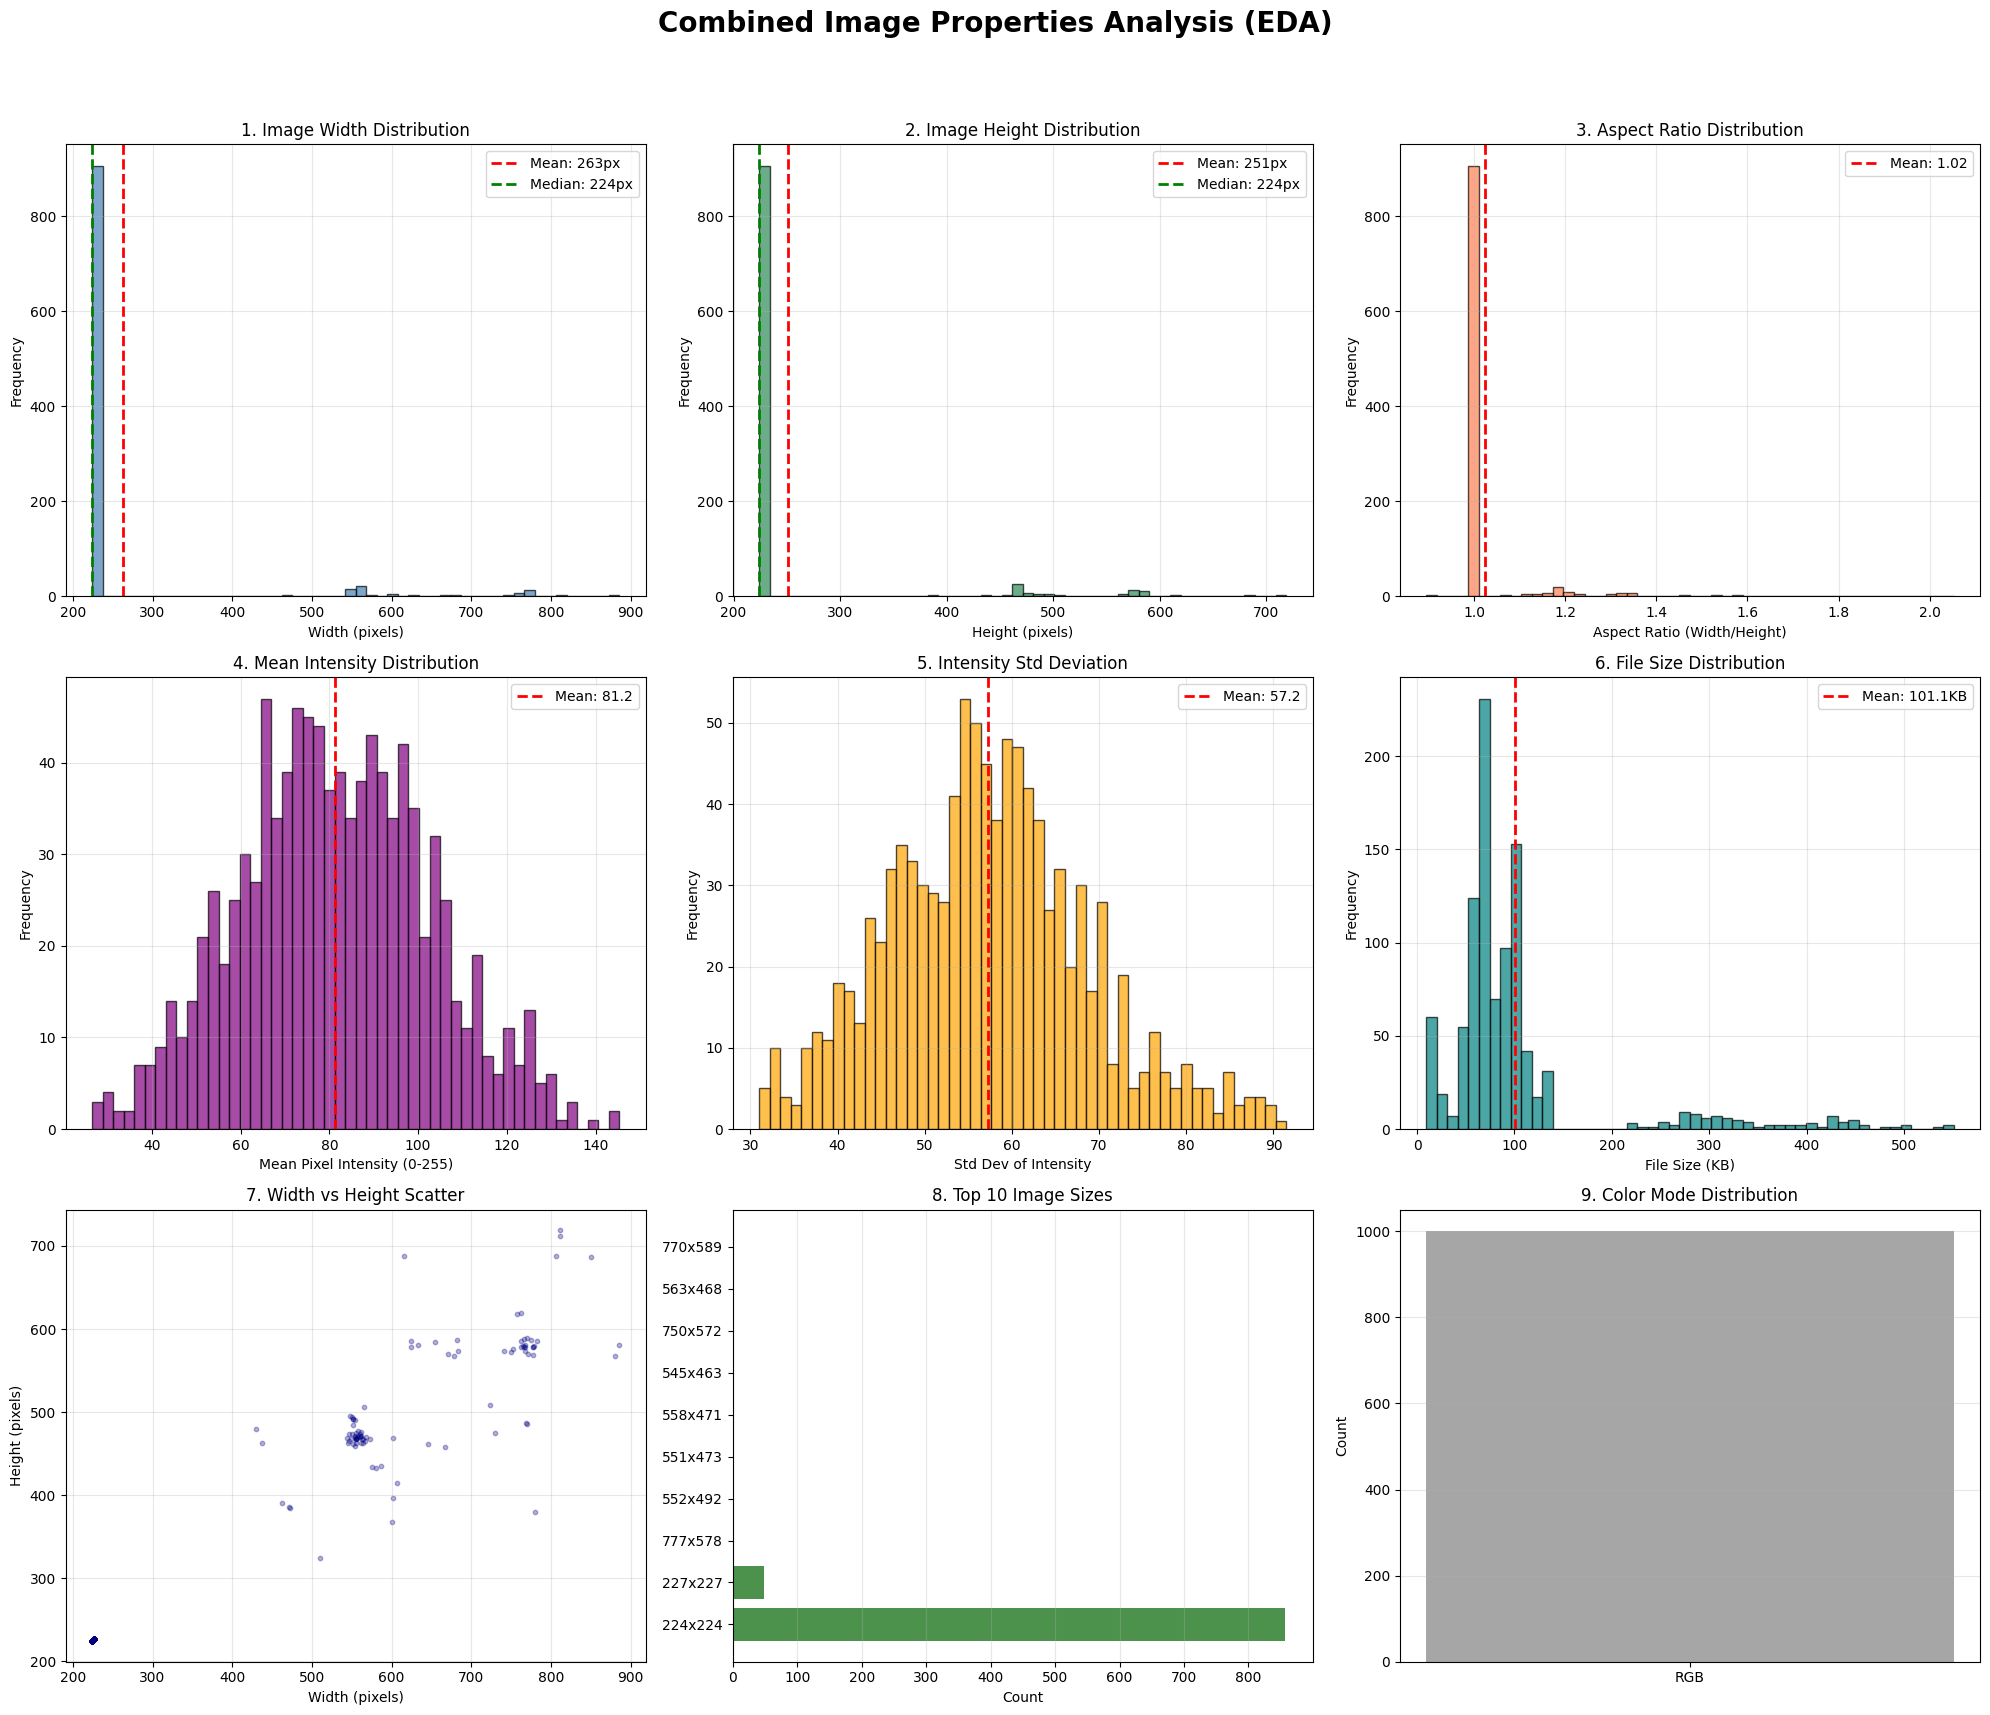

✅ Combined visualization saved: /content/data/eda_combined_analysis.png


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

print("📊 Generating a combined visualization of image properties...")

fig_combined = plt.figure(figsize=(20, 18))
fig_combined.suptitle('Combined Image Properties Analysis (EDA)', fontsize=20, fontweight='bold', y=0.98)

# 1. Width Distribution
ax1 = fig_combined.add_subplot(3, 3, 1)
ax1.hist(properties['widths'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
ax1.axvline(np.mean(properties['widths']), color='red', linestyle='--', label=f'Mean: {np.mean(properties["widths"]):.0f}px', linewidth=2)
ax1.axvline(np.median(properties['widths']), color='green', linestyle='--', label=f'Median: {np.median(properties["widths"]):.0f}px', linewidth=2)
ax1.set_xlabel('Width (pixels)')
ax1.set_ylabel('Frequency')
ax1.set_title('1. Image Width Distribution')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Height Distribution
ax2 = fig_combined.add_subplot(3, 3, 2)
ax2.hist(properties['heights'], bins=50, color='seagreen', edgecolor='black', alpha=0.7)
ax2.axvline(np.mean(properties['heights']), color='red', linestyle='--', label=f'Mean: {np.mean(properties["heights"]):.0f}px', linewidth=2)
ax2.axvline(np.median(properties['heights']), color='green', linestyle='--', label=f'Median: {np.median(properties["heights"]):.0f}px', linewidth=2)
ax2.set_xlabel('Height (pixels)')
ax2.set_ylabel('Frequency')
ax2.set_title('2. Image Height Distribution')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Aspect Ratio
ax3 = fig_combined.add_subplot(3, 3, 3)
ax3.hist(properties['aspect_ratios'], bins=50, color='coral', edgecolor='black', alpha=0.7)
ax3.axvline(np.mean(properties['aspect_ratios']), color='red', linestyle='--', label=f'Mean: {np.mean(properties["aspect_ratios"]):.2f}', linewidth=2)
ax3.set_xlabel('Aspect Ratio (Width/Height)')
ax3.set_ylabel('Frequency')
ax3.set_title('3. Aspect Ratio Distribution')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Mean Intensity
ax4 = fig_combined.add_subplot(3, 3, 4)
ax4.hist(properties['mean_intensities'], bins=50, color='purple', edgecolor='black', alpha=0.7)
ax4.axvline(np.mean(properties['mean_intensities']), color='red', linestyle='--', label=f'Mean: {np.mean(properties["mean_intensities"]):.1f}', linewidth=2)
ax4.set_xlabel('Mean Pixel Intensity (0-255)')
ax4.set_ylabel('Frequency')
ax4.set_title('4. Mean Intensity Distribution')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. Standard Deviation of Intensity
ax5 = fig_combined.add_subplot(3, 3, 5)
ax5.hist(properties['std_intensities'], bins=50, color='orange', edgecolor='black', alpha=0.7)
ax5.axvline(np.mean(properties['std_intensities']), color='red', linestyle='--', label=f'Mean: {np.mean(properties["std_intensities"]):.1f}', linewidth=2)
ax5.set_xlabel('Std Dev of Intensity')
ax5.set_ylabel('Frequency')
ax5.set_title('5. Intensity Std Deviation')
ax5.legend()
ax5.grid(True, alpha=0.3)

# 6. File Size
ax6 = fig_combined.add_subplot(3, 3, 6)
ax6.hist(properties['file_sizes_kb'], bins=50, color='teal', edgecolor='black', alpha=0.7)
ax6.axvline(np.mean(properties['file_sizes_kb']), color='red', linestyle='--', label=f'Mean: {np.mean(properties["file_sizes_kb"]):.1f}KB', linewidth=2)
ax6.set_xlabel('File Size (KB)')
ax6.set_ylabel('Frequency')
ax6.set_title('6. File Size Distribution')
ax6.legend()
ax6.grid(True, alpha=0.3)

# 7. Width vs Height Scatter
ax7 = fig_combined.add_subplot(3, 3, 7)
ax7.scatter(properties['widths'], properties['heights'], alpha=0.3, s=10, c='navy')
ax7.set_xlabel('Width (pixels)')
ax7.set_ylabel('Height (pixels)')
ax7.set_title('7. Width vs Height Scatter')
ax7.grid(True, alpha=0.3)

# 8. Top 10 Image Sizes
ax8 = fig_combined.add_subplot(3, 3, 8)
size_counts = Counter(properties['sizes']) # Recalculate for this plot as it's local
top_sizes = size_counts.most_common(10)
sizes_labels = [f"{s[0]}x{s[1]}" for s, _ in top_sizes]
sizes_counts = [c for _, c in top_sizes]
ax8.barh(range(len(sizes_labels)), sizes_counts, color='darkgreen', alpha=0.7)
ax8.set_yticks(range(len(sizes_labels)))
ax8.set_yticklabels(sizes_labels)
ax8.set_xlabel('Count')
ax8.set_title('8. Top 10 Image Sizes')
ax8.grid(True, alpha=0.3, axis='x')

# 9. Color Mode Distribution
ax9 = fig_combined.add_subplot(3, 3, 9)
mode_counts = Counter(properties['modes']) # Recalculate for this plot as it's local
mode_names = [{'L': 'Grayscale', 'RGB': 'RGB', 'RGBA': 'RGBA'}.get(m, m) for m in mode_counts.keys()]
mode_values = list(mode_counts.values())
ax9.bar(mode_names, mode_values, color=['gray', 'red', 'blue', 'orange'][:len(mode_names)], alpha=0.7)
ax9.set_ylabel('Count')
ax9.set_title('9. Color Mode Distribution')
ax9.grid(True, alpha=0.3, axis='y')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.savefig('/content/data/eda_combined_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Combined visualization saved: /content/data/eda_combined_analysis.png")

### Explanation of Combined Image Properties Analysis

This combined visualization provides a comprehensive overview of the key properties of the sampled ultrasound images. Each subplot focuses on a specific characteristic, helping us understand the dataset's variability and inform preprocessing strategies.

1.  **Image Width Distribution**: Shows the frequency of different image widths. Observe the range, dominant widths (often peaks), and the spread around the mean/median.
2.  **Image Height Distribution**: Similar to width, this displays the frequency of image heights, revealing common height values and their overall distribution.
3.  **Aspect Ratio Distribution**: Illustrates the ratio of width to height. A ratio close to 1 indicates square images, while values significantly higher or lower suggest rectangular shapes. This is crucial for resizing decisions.
4.  **Mean Intensity Distribution**: Plots the average pixel brightness across images. This can indicate overall brightness levels and consistency within the dataset. Ultrasound images tend to be darker, so a lower mean intensity is expected.
5.  **Intensity Std Deviation**: Shows the distribution of pixel intensity standard deviations. A higher standard deviation suggests more contrast within an image, while a lower one indicates flatter, less varied images.
6.  **File Size Distribution**: Displays how file sizes (in KB) are distributed. This can be influenced by image dimensions, compression, and color depth, providing insights into storage and loading times.
7.  **Width vs Height Scatter**: A scatter plot showing the relationship between image widths and heights. Clusters indicate common resolutions, while the spread highlights variability. Ideally, for consistent input to models, images should fall into a tight cluster or be resized.
8.  **Top 10 Image Sizes**: A bar chart highlighting the most frequently occurring widthxheight dimensions in the dataset. This helps identify any standard sizes that images might already be in.
9.  **Color Mode Distribution**: Shows the prevalence of different color modes (e.g., RGB for color, L for grayscale). This is essential for determining whether color channels need to be handled during preprocessing (e.g., converting all to grayscale).

By examining these plots together, we can make informed decisions about necessary image preprocessing steps such as resizing, color conversion, normalization, and potential data augmentation strategies.

#### above visualization is done by AI
#### Below is done by me

In [ ]:
# VISUALIZATIONS
print(f"\n📊 Creating visualizations...")

fig = plt.figure(figsize=(18, 12))
fig.suptitle('Image Properties Analysis (EDA)', fontsize=16, fontweight='bold')


📊 Creating visualizations...


Text(0.5, 0.98, 'Image Properties Analysis (EDA)')

<Figure size 1800x1200 with 0 Axes>

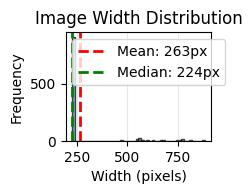

In [ ]:
# 1. Width Distribution
ax1 = plt.subplot(3, 3, 1)
ax1.hist(properties['widths'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
ax1.axvline(np.mean(properties['widths']), color='red', linestyle='--',
           label=f'Mean: {np.mean(properties["widths"]):.0f}px', linewidth=2)
ax1.axvline(np.median(properties['widths']), color='green', linestyle='--',
           label=f'Median: {np.median(properties["widths"]):.0f}px', linewidth=2)
ax1.set_xlabel('Width (pixels)')
ax1.set_ylabel('Frequency')
ax1.set_title('Image Width Distribution')
ax1.legend()
ax1.grid(True, alpha=0.3)

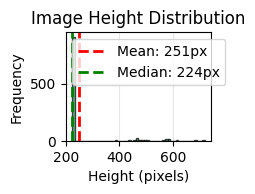

In [ ]:
# 2. Height Distribution
ax2 = plt.subplot(3, 3, 2)
ax2.hist(properties['heights'], bins=50, color='seagreen', edgecolor='black', alpha=0.7)
ax2.axvline(np.mean(properties['heights']), color='red', linestyle='--',
           label=f'Mean: {np.mean(properties["heights"]):.0f}px', linewidth=2)
ax2.axvline(np.median(properties['heights']), color='green', linestyle='--',
           label=f'Median: {np.median(properties["heights"]):.0f}px', linewidth=2)
ax2.set_xlabel('Height (pixels)')
ax2.set_ylabel('Frequency')
ax2.set_title('Image Height Distribution')
ax2.legend()
ax2.grid(True, alpha=0.3)

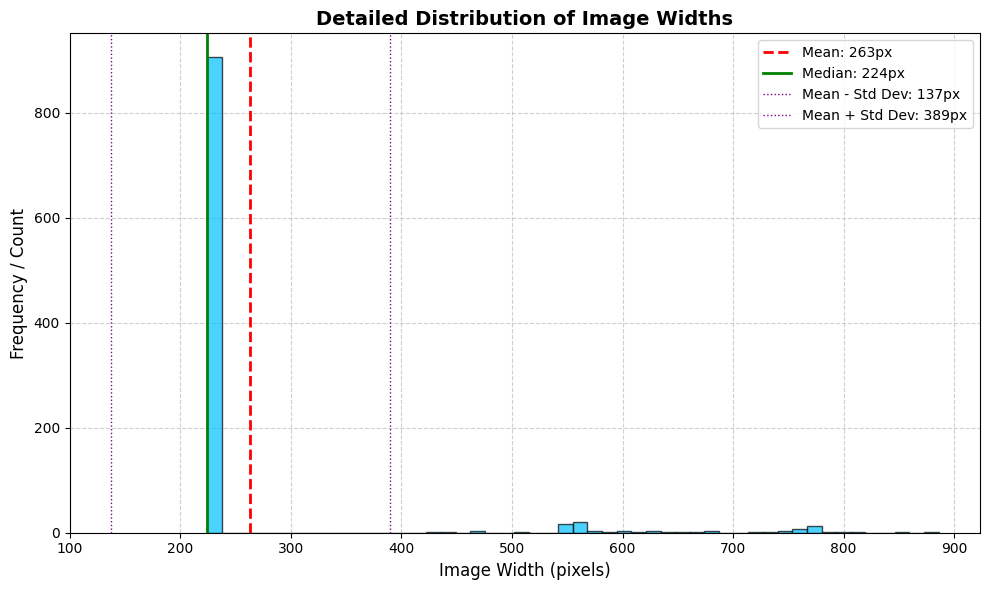


Statistical Summary for Image Widths:
  • Minimum Width: 224px
  • Maximum Width: 886px
  • Mean Width: 263.3px
  • Median Width: 224.0px
  • Standard Deviation of Width: 126.0px

Explanation:

This histogram shows the frequency of different image widths in our sampled dataset. The horizontal axis represents the image width in pixels, and the vertical axis shows how many images fall into each width range (bin).

Key observations from the plot and statistics:
  - **Dominant Width**: A large peak around 224px indicates that a significant number of images (about 857 in our sample) have this width, likely due to a common preprocessing step or source dataset.
  - **Range**: The widths vary from 224px to 886px, showing a mix of image resolutions.
  - **Mean vs. Median**: The mean (red dashed line) and median (green solid line) are very close, suggesting the distribution, while having some spread, is not heavily skewed by extreme values. The spread is captured by the standard deviation (purp

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a new figure for the detailed Width Distribution
fig_width = plt.figure(figsize=(10, 6))
ax_width = fig_width.add_subplot(1, 1, 1)

# Plotting the histogram
ax_width.hist(properties['widths'], bins=50, color='deepskyblue', edgecolor='black', alpha=0.7, zorder=2)

# Adding statistical lines
mean_width = np.mean(properties['widths'])
median_width = np.median(properties['widths'])
std_width = np.std(properties['widths'])

ax_width.axvline(mean_width, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_width:.0f}px')
ax_width.axvline(median_width, color='green', linestyle='-', linewidth=2, label=f'Median: {median_width:.0f}px')
# Optional: add standard deviation lines
ax_width.axvline(mean_width - std_width, color='purple', linestyle=':', linewidth=1, label=f'Mean - Std Dev: {(mean_width - std_width):.0f}px')
ax_width.axvline(mean_width + std_width, color='purple', linestyle=':', linewidth=1, label=f'Mean + Std Dev: {(mean_width + std_width):.0f}px')

ax_width.set_xlabel('Image Width (pixels)', fontsize=12)
ax_width.set_ylabel('Frequency / Count', fontsize=12)
ax_width.set_title('Detailed Distribution of Image Widths', fontsize=14, fontweight='bold')
ax_width.legend(fontsize=10)
ax_width.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

print(f"\nStatistical Summary for Image Widths:")
print(f"  • Minimum Width: {min(properties['widths']):.0f}px")
print(f"  • Maximum Width: {max(properties['widths']):.0f}px")
print(f"  • Mean Width: {mean_width:.1f}px")
print(f"  • Median Width: {median_width:.1f}px")
print(f"  • Standard Deviation of Width: {std_width:.1f}px")

# Explanation of the visualization:
print("\nExplanation:\n")
print("This histogram shows the frequency of different image widths in our sampled dataset. The horizontal axis represents the image width in pixels, and the vertical axis shows how many images fall into each width range (bin).")
print("\nKey observations from the plot and statistics:")
print(f"  - **Dominant Width**: A large peak around {median_width:.0f}px indicates that a significant number of images (about {properties['sizes'].count((224, 224))} in our sample) have this width, likely due to a common preprocessing step or source dataset.")
print(f"  - **Range**: The widths vary from {min(properties['widths']):.0f}px to {max(properties['widths']):.0f}px, showing a mix of image resolutions.")
print("  - **Mean vs. Median**: The mean (red dashed line) and median (green solid line) are very close, suggesting the distribution, while having some spread, is not heavily skewed by extreme values. The spread is captured by the standard deviation (purple dotted lines).")
print("  - **Implications for Preprocessing**: The presence of a dominant size suggests that resizing images to a standard dimension like 224x224 pixels (which is a common input size for many deep learning models) will affect a majority of images relatively little, while larger images will be downscaled, and smaller ones upscaled or padded. This normalization helps ensure consistent input for models.")

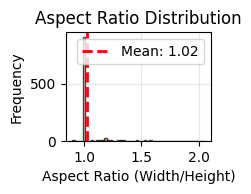

In [ ]:
# 3. Aspect Ratio
ax3 = plt.subplot(3, 3, 3)
ax3.hist(properties['aspect_ratios'], bins=50, color='coral', edgecolor='black', alpha=0.7)
ax3.axvline(np.mean(properties['aspect_ratios']), color='red', linestyle='--',
           label=f'Mean: {np.mean(properties["aspect_ratios"]):.2f}', linewidth=2)
ax3.set_xlabel('Aspect Ratio (Width/Height)')
ax3.set_ylabel('Frequency')
ax3.set_title('Aspect Ratio Distribution')
ax3.legend()
ax3.grid(True, alpha=0.3)

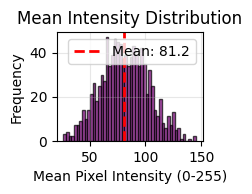

In [ ]:
# 4. Mean Intensity
ax4 = plt.subplot(3, 3, 4)
ax4.hist(properties['mean_intensities'], bins=50, color='purple', edgecolor='black', alpha=0.7)
ax4.axvline(np.mean(properties['mean_intensities']), color='red', linestyle='--',
           label=f'Mean: {np.mean(properties["mean_intensities"]):.1f}', linewidth=2)
ax4.set_xlabel('Mean Pixel Intensity (0-255)')
ax4.set_ylabel('Frequency')
ax4.set_title('Mean Intensity Distribution')
ax4.legend()
ax4.grid(True, alpha=0.3)

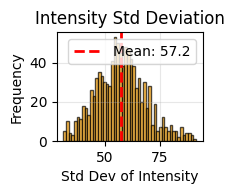

In [ ]:
# 5. Standard Deviation
ax5 = plt.subplot(3, 3, 5)
ax5.hist(properties['std_intensities'], bins=50, color='orange', edgecolor='black', alpha=0.7)
ax5.axvline(np.mean(properties['std_intensities']), color='red', linestyle='--',
           label=f'Mean: {np.mean(properties["std_intensities"]):.1f}', linewidth=2)
ax5.set_xlabel('Std Dev of Intensity')
ax5.set_ylabel('Frequency')
ax5.set_title('Intensity Std Deviation')
ax5.legend()
ax5.grid(True, alpha=0.3)

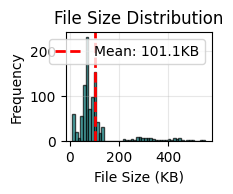

In [ ]:
# 6. File Size
ax6 = plt.subplot(3, 3, 6)
ax6.hist(properties['file_sizes_kb'], bins=50, color='teal', edgecolor='black', alpha=0.7)
ax6.axvline(np.mean(properties['file_sizes_kb']), color='red', linestyle='--',
           label=f'Mean: {np.mean(properties["file_sizes_kb"]):.1f}KB', linewidth=2)
ax6.set_xlabel('File Size (KB)')
ax6.set_ylabel('Frequency')
ax6.set_title('File Size Distribution')
ax6.legend()
ax6.grid(True, alpha=0.3)

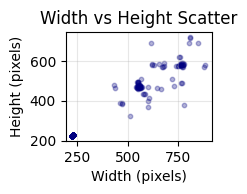

In [ ]:
# 7. Width vs Height Scatter
ax7 = plt.subplot(3, 3, 7)
ax7.scatter(properties['widths'], properties['heights'], alpha=0.3, s=10, c='navy')
ax7.set_xlabel('Width (pixels)')
ax7.set_ylabel('Height (pixels)')
ax7.set_title('Width vs Height Scatter')
ax7.grid(True, alpha=0.3)

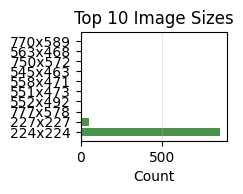

In [ ]:
# 8. Size Distribution (Top 10)
ax8 = plt.subplot(3, 3, 8)
top_sizes = size_counts.most_common(10)
sizes_labels = [f"{s[0]}x{s[1]}" for s, _ in top_sizes]
sizes_counts = [c for _, c in top_sizes]
ax8.barh(range(len(sizes_labels)), sizes_counts, color='darkgreen', alpha=0.7)
ax8.set_yticks(range(len(sizes_labels)))
ax8.set_yticklabels(sizes_labels)
ax8.set_xlabel('Count')
ax8.set_title('Top 10 Image Sizes')
ax8.grid(True, alpha=0.3, axis='x')

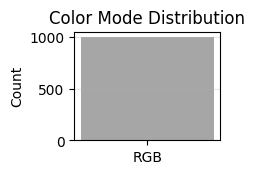

In [ ]:
# 9. Mode Distribution
ax9 = plt.subplot(3, 3, 9)
mode_names = [{'L': 'Grayscale', 'RGB': 'RGB', 'RGBA': 'RGBA'}.get(m, m)
              for m in mode_counts.keys()]
mode_values = list(mode_counts.values())
ax9.bar(mode_names, mode_values, color=['gray', 'red', 'blue'][:len(mode_names)], alpha=0.7)
ax9.set_ylabel('Count')
ax9.set_title('Color Mode Distribution')
ax9.grid(True, alpha=0.3, axis='y')

In [ ]:
plt.tight_layout()
plt.savefig('/content/data/eda_complete_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Analysis complete! Saved to: /content/data/eda_complete_analysis.png")

<Figure size 640x480 with 0 Axes>

✅ Analysis complete! Saved to: /content/data/eda_complete_analysis.png


In [ ]:
# RECOMMENDATIONS

print("💡 PREPROCESSING RECOMMENDATIONS")

# Determine optimal size
median_w = int(np.median(properties['widths']))
median_h = int(np.median(properties['heights']))

# Round to nearest power of 2 or common size
common_sizes = [224, 256, 384, 512]
recommended_size = min(common_sizes, key=lambda x: abs(x - max(median_w, median_h)))

print(f"""
Based on the analysis:

1. 📐 RESIZE STRATEGY:
   • Median size: {median_w}x{median_h}
   • Recommended: {recommended_size}x{recommended_size} (square)
   • Reason: Good balance for CNN+ViT, maintains aspect ratio

2. 🎨 COLOR CONVERSION:
   • Convert all to Grayscale (if mostly grayscale already)
   • OR keep RGB (if significant color variation)

3. 💡 NORMALIZATION:
   • Mean intensity: {np.mean(properties['mean_intensities']):.1f}
   • Use standardization: (pixel - mean) / std
   • Or min-max scaling: pixel / 255.0

4. 🔧 PREPROCESSING STEPS:
   1. Resize to {recommended_size}x{recommended_size}
   2. Convert to grayscale (ultrasound is inherently grayscale)
   3. Apply CLAHE for contrast enhancement
   4. Denoise (median filter for speckle reduction)
   5. Normalize pixel values

5. 📊 DATA AUGMENTATION (for training):
   • Random rotation: ±15°
   • Random zoom: 0.9-1.1x
   • Horizontal flip: Yes
   • Vertical flip: No (anatomical orientation)
   • Brightness: ±10%
""")

# Save summary
summary_stats = {
    'sample_size': sample_size,
    'width_mean': np.mean(properties['widths']),
    'width_median': np.median(properties['widths']),
    'height_mean': np.mean(properties['heights']),
    'height_median': np.median(properties['heights']),
    'recommended_size': recommended_size,
    'mean_intensity': np.mean(properties['mean_intensities']),
    'std_intensity': np.mean(properties['std_intensities'])
}

import json
with open('/content/data/eda_summary.json', 'w') as f:
    json.dump(summary_stats, f, indent=2)

print("\n✅ EDA summary saved to: /content/data/eda_summary.json")

💡 PREPROCESSING RECOMMENDATIONS

Based on the analysis:

1. 📐 RESIZE STRATEGY:
   • Median size: 224x224
   • Recommended: 224x224 (square)
   • Reason: Good balance for CNN+ViT, maintains aspect ratio

2. 🎨 COLOR CONVERSION:
   • Convert all to Grayscale (if mostly grayscale already)
   • OR keep RGB (if significant color variation)

3. 💡 NORMALIZATION:
   • Mean intensity: 81.2
   • Use standardization: (pixel - mean) / std
   • Or min-max scaling: pixel / 255.0

4. 🔧 PREPROCESSING STEPS:
   1. Resize to 224x224
   2. Convert to grayscale (ultrasound is inherently grayscale)
   3. Apply CLAHE for contrast enhancement
   4. Denoise (median filter for speckle reduction)
   5. Normalize pixel values

5. 📊 DATA AUGMENTATION (for training):
   • Random rotation: ±15°
   • Random zoom: 0.9-1.1x
   • Horizontal flip: Yes
   • Vertical flip: No (anatomical orientation)
   • Brightness: ±10%


✅ EDA summary saved to: /content/data/eda_summary.json


In [ ]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image
import numpy as np
import cv2
import os
from pathlib import Path

print("Necessary libraries imported.")

Necessary libraries imported.


In [ ]:
class PreprocessingTransform:
    def __init__(self, target_size=(224, 224)):
        self.target_size = target_size

    def __call__(self, img):
        # 1. Resize the image
        img = img.resize(self.target_size)

        # 2. Convert to grayscale
        # PIL Image 'L' mode is grayscale
        img_gray = img.convert('L')

        # Convert PIL Image to numpy array for OpenCV operations
        img_np = np.array(img_gray)

        # 3. Apply CLAHE for contrast enhancement
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        img_clahe = clahe.apply(img_np)

        # 4. Denoise using a median filter
        img_denoised = cv2.medianBlur(img_clahe, 5) # 5x5 kernel size

        # Convert back to PIL Image for torchvision.transforms
        img_pil = Image.fromarray(img_denoised)

        # 5. Convert to PyTorch tensor and normalize
        # Scale to [0, 1] and then normalize with mean/std for common models
        transform_tensor = transforms.Compose([
            transforms.ToTensor(), # Converts to [0,1] range
            transforms.Normalize(mean=[0.5], std=[0.5]) # Normalize for single channel grayscale
        ])
        img_tensor = transform_tensor(img_pil)

        return img_tensor

print("PreprocessingTransform class defined.")

PreprocessingTransform class defined.


In [ ]:
class BreastUltrasoundDataset(Dataset):
    def __init__(self, root_dir, dataset_names, transform=None):
        self.root_dir = Path(root_dir)
        self.dataset_names = dataset_names
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.label_map = {}
        self._load_dataset()

    def _load_dataset(self):
        label_idx = 0
        for ds_name in self.dataset_names:
            dataset_path = self.root_dir / ds_name
            if not dataset_path.exists():
                print(f"Warning: Dataset path {dataset_path} does not exist. Skipping.")
                continue

            # Dynamically find image folders and labels
            for sub_root, _, files in os.walk(dataset_path):
                # Check if this folder contains image files (excluding masks)
                img_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg')) and '_mask' not in f.lower()]

                if img_files:
                    # Use the folder name as the label
                    current_label_name = os.path.basename(sub_root)

                    # Special handling for Ultrasound-Breast-Cancer structure where 'train/benign' or 'val/malignant' are labels
                    if ds_name == 'Ultrasound-Breast-Cancer':
                        # The actual labels are 'benign' and 'malignant' directly within train/val folders
                        if current_label_name == 'benign' or current_label_name == 'malignant':
                            pass # Use current_label_name as is
                        elif current_label_name == 'train' or current_label_name == 'val':
                             # Skip 'train' and 'val' folders themselves, actual labels are deeper
                            continue
                        elif current_label_name == 'ultrasound breast classification':
                            continue # Skip this wrapper folder
                        else:
                            # For other subfolders, infer from parent if possible
                            parent_folder = os.path.basename(Path(sub_root).parent)
                            if parent_folder == 'train' or parent_folder == 'val':
                                # If parent is train/val, then the current folder is the label (benign/malignant)
                                pass
                            else:
                                print(f"Warning: Unexpected label structure in {ds_name} at {sub_root}. Using '{current_label_name}' as label.")

                    # Special handling for Breast-Ultrasound-BUSI structure
                    elif ds_name == 'Breast-Ultrasound-BUSI':
                        if current_label_name == 'benign' or current_label_name == 'malignant' or current_label_name == 'normal':
                            pass # Use current_label_name as is
                        elif current_label_name == 'Dataset_BUSI_with_GT':
                            continue # Skip this wrapper folder
                        else:
                             print(f"Warning: Unexpected label structure in {ds_name} at {sub_root}. Using '{current_label_name}' as label.")

                    if current_label_name not in self.label_map:
                        self.label_map[current_label_name] = label_idx
                        label_idx += 1

                    numerical_label = self.label_map[current_label_name]

                    for img_file in img_files:
                        self.image_paths.append(os.path.join(sub_root, img_file))
                        self.labels.append(numerical_label)

        # Debug print to confirm collected paths and labels
        print(f"Found {len(self.image_paths)} images across specified datasets.")
        print(f"Label mapping: {self.label_map}")


    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]

        img = Image.open(img_path).convert('RGB') # Open image in RGB mode

        if self.transform:
            img = self.transform(img)

        return img, label

print("BreastUltrasoundDataset class defined.")


BreastUltrasoundDataset class defined.


In [ ]:
root_dir = '/content/data/raw'
dataset_names_to_load = [
    'Ultrasound-Breast-Cancer',
    'Breast-Ultrasound-BUSI'
]

# Instantiate the preprocessing transform
preprocess = PreprocessingTransform(target_size=(224, 224))

# Create the custom dataset
full_dataset = BreastUltrasoundDataset(
    root_dir=root_dir,
    dataset_names=dataset_names_to_load,
    transform=preprocess
)

print(f"Total images in the full dataset: {len(full_dataset)}")
print(f"Number of unique labels: {len(full_dataset.label_map)}")
print(f"Label mapping: {full_dataset.label_map}")

# Split the dataset into training and validation sets
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size

train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

print(f"\nTraining set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")

# Create DataLoaders
batch_size = 32 # Can be adjusted based on GPU memory
num_workers = 2 # Number of subprocesses to use for data loading

train_loader = DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers
)
val_loader = DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers
)

print(f"\nTraining DataLoader created with batch size {batch_size} and {num_workers} workers.")
print(f"Validation DataLoader created with batch size {batch_size} and {num_workers} workers.")

# Optional: Check a sample batch
# for images, labels in train_loader:
#     print(f"\nSample batch from Training DataLoader:")
#     print(f"  Image batch shape: {images.shape}") # Expected: [batch_size, 1, 224, 224]
#     print(f"  Label batch shape: {labels.shape}") # Expected: [batch_size]
#     print(f"  Sample labels: {labels[:5].tolist()}")
#     break

print("Dataset and DataLoaders successfully prepared.")

Found 9796 images across specified datasets.
Label mapping: {'benign': 0, 'malignant': 1, 'normal': 2}
Total images in the full dataset: 9796
Number of unique labels: 3
Label mapping: {'benign': 0, 'malignant': 1, 'normal': 2}

Training set size: 7836
Validation set size: 1960

Training DataLoader created with batch size 32 and 2 workers.
Validation DataLoader created with batch size 32 and 2 workers.
Dataset and DataLoaders successfully prepared.


## Define Hybrid CNN-ViT Model Architecture


#### importing all necessary PyTorch libraries for building neural networks.



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models

print("PyTorch libraries imported for model building.")

PyTorch libraries imported for model building.


In [ ]:
class CNNBackbone(nn.Module):
    def __init__(self, in_channels=1, output_channels=256):
        super(CNNBackbone, self).__init__()
        # A simple convolutional block structure
        self.features = nn.Sequential(
            nn.Conv2d(in_channels, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, output_channels, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

    def forward(self, x):
        return self.features(x)


print("CNNBackbone class defined.")

# Test the CNN backbone output shape
dummy_input = torch.randn(1, 1, 224, 224) # Batch size, channels, height, width
cnn_backbone = CNNBackbone()
output_feature_map = cnn_backbone(dummy_input)
print(f"CNN Backbone output feature map shape: {output_feature_map.shape}")


CNNBackbone class defined.
CNN Backbone output feature map shape: torch.Size([1, 256, 14, 14])


In [ ]:
class PatchEmbedding(nn.Module):
    def __init__(self, in_channels, patch_size, embed_dim, feature_map_size):
        super().__init__()
        # Convolutional layer to create patches and project them to embed_dim
        # kernel_size = patch_size, stride = patch_size ensures non-overlapping patches
        self.patch_embeddings = nn.Conv2d(in_channels, embed_dim, kernel_size=patch_size, stride=patch_size)

        # Calculate the number of patches
        # The feature_map_size is the output spatial dimension from the CNN (e.g., 14x14)
        # num_patches = (feature_map_size / patch_size) ** 2
        num_patches = (feature_map_size // patch_size) * (feature_map_size // patch_size)

        self.position_embeddings = nn.Parameter(torch.randn(1, num_patches + 1, embed_dim)) # +1 for CLS token

    def forward(self, x):
        # x: (batch_size, in_channels, H, W)
        x = self.patch_embeddings(x) # (batch_size, embed_dim, num_patches_H, num_patches_W)
        x = x.flatten(2)           # (batch_size, embed_dim, num_patches)
        x = x.transpose(1, 2)      # (batch_size, num_patches, embed_dim)
        return x


class Attention(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super().__init__()
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads
        self.scale = self.head_dim ** -0.5

        self.qkv = nn.Linear(embed_dim, embed_dim * 3)
        self.out = nn.Linear(embed_dim, embed_dim)

    def forward(self, x):
        B, N, C = x.shape
        qkv = self.qkv(x).reshape(B, N, 3, self.num_heads, self.head_dim).permute(2, 0, 3, 1, 4)
        q, k, v = qkv[0], qkv[1], qkv[2]

        attn = (q @ k.transpose(-2, -1)) * self.scale
        attn = attn.softmax(dim=-1)

        x = (attn @ v).transpose(1, 2).reshape(B, N, C)
        x = self.out(x)
        return x


class MLP(nn.Module):
    def __init__(self, embed_dim, mlp_ratio=4., dropout=0.):
        super().__init__()
        hidden_dim = int(embed_dim * mlp_ratio)
        self.net = nn.Sequential(
            nn.Linear(embed_dim, hidden_dim),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, embed_dim),
            nn.Dropout(dropout)
        )

    def forward(self, x):
        return self.net(x)


class Block(nn.Module):
    def __init__(self, embed_dim, num_heads, mlp_ratio=4., dropout=0.):
        super().__init__()
        self.norm1 = nn.LayerNorm(embed_dim)
        self.attn = Attention(embed_dim, num_heads=num_heads)
        self.norm2 = nn.LayerNorm(embed_dim)
        self.mlp = MLP(embed_dim, mlp_ratio=mlp_ratio, dropout=dropout)

    def forward(self, x):
        x = x + self.attn(self.norm1(x))
        x = x + self.mlp(self.norm2(x))
        return x


class VisionTransformer(nn.Module):
    def __init__(self,
                 embed_dim=768,
                 patch_size=2,
                 num_heads=12,
                 num_blocks=6,
                 mlp_ratio=4.,
                 dropout=0.,
                 in_channels_cnn_output=256,
                 cnn_feature_map_size=14):
        super().__init__()

        self.patch_embedding = PatchEmbedding(in_channels=in_channels_cnn_output,
                                            patch_size=patch_size,
                                            embed_dim=embed_dim,
                                            feature_map_size=cnn_feature_map_size)

        self.cls_token = nn.Parameter(torch.randn(1, 1, embed_dim))

        self.blocks = nn.ModuleList([
            Block(embed_dim, num_heads, mlp_ratio, dropout)
            for _ in range(num_blocks)
        ])
        self.norm = nn.LayerNorm(embed_dim)

    def forward(self, x):
        # x is assumed to be the feature map from CNN: (B, C_out_cnn, H_out_cnn, W_out_cnn)
        x = self.patch_embedding(x) # (B, num_patches, embed_dim)

        # Add CLS token
        cls_tokens = self.cls_token.expand(x.shape[0], -1, -1) # (B, 1, embed_dim)
        x = torch.cat((cls_tokens, x), dim=1) # (B, num_patches + 1, embed_dim)

        # Add positional embeddings
        x = x + self.patch_embedding.position_embeddings

        for block in self.blocks:
            x = block(x)

        x = self.norm(x)

        # Return the CLS token for classification
        return x[:, 0] # (B, embed_dim)


print("VisionTransformer and its sub-components (PatchEmbedding, Attention, MLP, Block) defined.")

# Test the VisionTransformer with a dummy input from the CNN Backbone
dummy_cnn_output = output_feature_map # Use the output from the previous CNN test

# Instantiate ViT with parameters matching the CNN output and desired embedding
# CNN output was (1, 256, 14, 14)
# So, in_channels_cnn_output=256, cnn_feature_map_size=14
# If patch_size is 2, then num_patches = (14/2)^2 = 7^2 = 49 patches
v_transformer = VisionTransformer(
    embed_dim=768, # Common ViT embedding dimension
    patch_size=2,
    num_heads=12,
    num_blocks=6,
    in_channels_cnn_output=256,
    cnn_feature_map_size=14
)

vit_output = v_transformer(dummy_cnn_output)
print(f"Vision Transformer output shape (CLS token): {vit_output.shape}")

VisionTransformer and its sub-components (PatchEmbedding, Attention, MLP, Block) defined.
Vision Transformer output shape (CLS token): torch.Size([1, 768])


In [ ]:
class HybridCNNViT(nn.Module):
    def __init__(self, num_classes, cnn_output_channels=256, cnn_feature_map_size=14,
                 vit_embed_dim=768, vit_patch_size=2, vit_num_heads=12, vit_num_blocks=6):
        super().__init__()
        self.cnn_backbone = CNNBackbone(in_channels=1, output_channels=cnn_output_channels)
        self.vision_transformer = VisionTransformer(
            embed_dim=vit_embed_dim,
            patch_size=vit_patch_size,
            num_heads=vit_num_heads,
            num_blocks=vit_num_blocks,
            in_channels_cnn_output=cnn_output_channels,
            cnn_feature_map_size=cnn_feature_map_size
        )
        self.classifier = nn.Linear(vit_embed_dim, num_classes)

    def forward(self, x):
        # 1. Pass through CNN backbone
        cnn_features = self.cnn_backbone(x) # (B, cnn_output_channels, H_out, W_out)

        # 2. Pass through Vision Transformer
        vit_output = self.vision_transformer(cnn_features) # (B, vit_embed_dim) (CLS token)

        # 3. Classification head
        logits = self.classifier(vit_output)
        return logits


print("HybridCNNViT class defined.")

# Instantiate the complete hybrid model and test it (Instruction 6)
num_classes = len(full_dataset.label_map) # Get number of unique labels from the dataset

hybrid_model = HybridCNNViT(num_classes=num_classes)

print(f"\nHybrid Model Architecture:\n{hybrid_model}")

# Test with a dummy input tensor (B, C, H, W) -> (batch_size, 1, 224, 224)
dummy_input = torch.randn(1, 1, 224, 224)
model_output = hybrid_model(dummy_input)
print(f"\nDummy input passed through HybridCNNViT. Output shape: {model_output.shape}")
print(f"Expected output shape: torch.Size([1, {num_classes}])")


HybridCNNViT class defined.

Hybrid Model Architecture:
HybridCNNViT(
  (cnn_backbone): CNNBackbone(
    (features): Sequential(
      (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): ReLU()
      (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU()
      (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (9): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (10): ReLU()
      (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
  )
  (vision_transformer): VisionTransformer(
    (patch_embedding): PatchEmbedding(
      (patch_embeddings): Conv2d(256, 768, kernel_s

In [ ]:
class CNNBackbone(nn.Module):
    def __init__(self, in_channels=1, output_channels=256):
        super(CNNBackbone, self).__init__()
        # A simple convolutional block structure
        self.features = nn.Sequential(
            nn.Conv2d(in_channels, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, output_channels, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

    def forward(self, x):
        return self.features(x)

In [ ]:
class PatchEmbedding(nn.Module):
    def __init__(self, in_channels, patch_size, embed_dim, feature_map_size):
        super().__init__()
        # Convolutional layer to create patches and project them to embed_dim
        # kernel_size = patch_size, stride = patch_size ensures non-overlapping patches
        self.patch_embeddings = nn.Conv2d(in_channels, embed_dim, kernel_size=patch_size, stride=patch_size)

        # Calculate the number of patches
        # The feature_map_size is the output spatial dimension from the CNN (e.g., 14x14)
        # num_patches = (feature_map_size / patch_size) ** 2
        num_patches = (feature_map_size // patch_size) * (feature_map_size // patch_size)

        self.position_embeddings = nn.Parameter(torch.randn(1, num_patches + 1, embed_dim)) # +1 for CLS token

    def forward(self, x):
        # x: (batch_size, in_channels, H, W)
        x = self.patch_embeddings(x) # (batch_size, embed_dim, num_patches_H, num_patches_W)
        x = x.flatten(2)           # (batch_size, embed_dim, num_patches)
        x = x.transpose(1, 2)      # (batch_size, num_patches, embed_dim)
        return x


class Attention(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super().__init__()
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads
        self.scale = self.head_dim ** -0.5

        self.qkv = nn.Linear(embed_dim, embed_dim * 3)
        self.out = nn.Linear(embed_dim, embed_dim)

    def forward(self, x):
        B, N, C = x.shape
        qkv = self.qkv(x).reshape(B, N, 3, self.num_heads, self.head_dim).permute(2, 0, 3, 1, 4)
        q, k, v = qkv[0], qkv[1], qkv[2]

        attn = (q @ k.transpose(-2, -1)) * self.scale
        attn = attn.softmax(dim=-1)

        x = (attn @ v).transpose(1, 2).reshape(B, N, C)
        x = self.out(x)
        return x


class MLP(nn.Module):
    def __init__(self, embed_dim, mlp_ratio=4., dropout=0.):
        super().__init__()
        hidden_dim = int(embed_dim * mlp_ratio)
        self.net = nn.Sequential(
            nn.Linear(embed_dim, hidden_dim),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, embed_dim),
            nn.Dropout(dropout)
        )

    def forward(self, x):
        return self.net(x)


class Block(nn.Module):
    def __init__(self, embed_dim, num_heads, mlp_ratio=4., dropout=0.):
        super().__init__()
        self.norm1 = nn.LayerNorm(embed_dim)
        self.attn = Attention(embed_dim, num_heads=num_heads)
        self.norm2 = nn.LayerNorm(embed_dim)
        self.mlp = MLP(embed_dim, mlp_ratio=mlp_ratio, dropout=dropout)

    def forward(self, x):
        x = x + self.attn(self.norm1(x))
        x = x + self.mlp(self.norm2(x))
        return x


class VisionTransformer(nn.Module):
    def __init__(self,
                 embed_dim=768,
                 patch_size=2,
                 num_heads=12,
                 num_blocks=6,
                 mlp_ratio=4.,
                 dropout=0.,
                 in_channels_cnn_output=256,
                 cnn_feature_map_size=14):
        super().__init__()

        self.patch_embedding = PatchEmbedding(in_channels=in_channels_cnn_output,
                                            patch_size=patch_size,
                                            embed_dim=embed_dim,
                                            feature_map_size=cnn_feature_map_size)

        self.cls_token = nn.Parameter(torch.randn(1, 1, embed_dim))

        self.blocks = nn.ModuleList([
            Block(embed_dim, num_heads, mlp_ratio, dropout)
            for _ in range(num_blocks)
        ])
        self.norm = nn.LayerNorm(embed_dim)

    def forward(self, x):
        # x is assumed to be the feature map from CNN: (B, C_out_cnn, H_out_cnn, W_out_cnn)
        x = self.patch_embedding(x) # (B, num_patches, embed_dim)

        # Add CLS token
        cls_tokens = self.cls_token.expand(x.shape[0], -1, -1) # (B, 1, embed_dim)
        x = torch.cat((cls_tokens, x), dim=1) # (B, num_patches + 1, embed_dim)

        # Add positional embeddings
        x = x + self.patch_embedding.position_embeddings

        for block in self.blocks:
            x = block(x)

        x = self.norm(x)

        # Return the CLS token for classification
        return x[:, 0] # (B, embed_dim)

## Train Hybrid Model (Separate File for Deployment)



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import os

print("Necessary libraries imported for model training.")

Necessary libraries imported for model training.


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Instantiate the hybrid model and move it to the device
# num_classes was determined from full_dataset.label_map in a previous step
num_classes = len(full_dataset.label_map)
hybrid_model = HybridCNNViT(num_classes=num_classes).to(device)
print(f"Hybrid CNN-ViT model instantiated with {num_classes} classes and moved to {device}.")

# Define loss function
criterion = nn.CrossEntropyLoss()
print("Loss function (CrossEntropyLoss) defined.")

# Define optimizer
learning_rate = 1e-4 # Can be tuned
optimizer = optim.Adam(hybrid_model.parameters(), lr=learning_rate)
print(f"Optimizer (Adam) defined with learning rate: {learning_rate}.")

# Set number of epochs
num_epochs = 10 # Can be adjusted
print(f"Number of training epochs set to: {num_epochs}.")

Using device: cpu
Hybrid CNN-ViT model instantiated with 3 classes and moved to cpu.
Loss function (CrossEntropyLoss) defined.
Optimizer (Adam) defined with learning rate: 0.0001.
Number of training epochs set to: 10.


In [ ]:
print("Starting model training with error handling...")

# Create a directory for saving trained models (ensure it exists)
model_save_dir = '/content/trained_models'
os.makedirs(model_save_dir, exist_ok=True)
print(f"Model will be saved in: {model_save_dir}")

# Training Loop
for epoch in range(num_epochs):
    # Training Phase
    hybrid_model.train() # Set model to training mode
    running_train_loss = 0.0
    correct_train = 0
    total_train = 0

    train_loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]", leave=False)
    for batch_idx, (images, labels) in enumerate(train_loop):
        # Skip if the batch is empty (e.g., all samples were corrupted)
        if images.size(0) == 0:
            continue

        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = hybrid_model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        train_loop.set_postfix(loss=running_train_loss/(batch_idx+1), acc=100.*correct_train/total_train)

    avg_train_loss = running_train_loss / len(train_loader)
    train_accuracy = 100. * correct_train / total_train

    # Validation Phase
    hybrid_model.eval() # Set model to evaluation mode
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0

    val_loop = tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Val]  ", leave=False)
    with torch.no_grad(): # Disable gradient calculation for validation
        for batch_idx, (images, labels) in enumerate(val_loop):
            # Skip if the batch is empty
            if images.size(0) == 0:
                continue

            images, labels = images.to(device), labels.to(device)

            outputs = hybrid_model(images)
            loss = criterion(outputs, labels)

            running_val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            val_loop.set_postfix(loss=running_val_loss/(batch_idx+1), acc=100.*correct_val/total_val)

    avg_val_loss = running_val_loss / len(val_loader)
    val_accuracy = 100. * correct_val / total_val

    print(f"Epoch {epoch+1}/{num_epochs} -> Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.2f}% | Val Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy:.2f}%")

    # Save the model state dictionary
    model_path = os.path.join(model_save_dir, f'hybrid_cnn_vit_model_epoch_{epoch+1}.pth')
    torch.save(hybrid_model.state_dict(), model_path)
    print(f"Model saved to {model_path}")

print("Training complete!")

Starting model training with error handling...
Model will be saved in: /content/trained_models


Epoch 1/10 [Train]:  87%|████████▋ | 211/242 [40:15<05:46, 11.16s/it, acc=73.4, loss=0.581]

Epoch 1/10 [Train]:  88%|████████▊ | 214/242 [40:50<05:19, 11.41s/it, acc=73.5, loss=0.58]

Epoch 1/10 -> Train Loss: 0.5712, Train Acc: 74.16% | Val Loss: 0.5842, Val Acc: 75.98%
Model saved to /content/trained_models/hybrid_cnn_vit_model_epoch_1.pth


Epoch 2/10 [Train]:  27%|██▋       | 66/242 [12:16<36:41, 12.51s/it, acc=77.8, loss=0.534]

Epoch 2/10 [Train]:  36%|███▌      | 87/242 [16:07<28:00, 10.84s/it, acc=77.5, loss=0.532]

Epoch 2/10 -> Train Loss: 0.4862, Train Acc: 79.30% | Val Loss: 0.4169, Val Acc: 83.18%
Model saved to /content/trained_models/hybrid_cnn_vit_model_epoch_2.pth


Epoch 3/10 [Train]:   3%|▎         | 8/242 [01:44<45:36, 11.70s/it, acc=86.3, loss=0.334]

Epoch 3/10 [Train]:  48%|████▊     | 115/242 [21:36<23:32, 11.12s/it, acc=84.1, loss=0.389]

Epoch 3/10 -> Train Loss: 0.3898, Train Acc: 83.97% | Val Loss: 0.3851, Val Acc: 84.11%
Model saved to /content/trained_models/hybrid_cnn_vit_model_epoch_3.pth


Epoch 4/10 [Train]:  21%|██▏       | 52/242 [09:54<35:19, 11.15s/it, acc=85.8, loss=0.342]

Epoch 4/10 [Train]:  45%|████▌     | 110/242 [20:43<25:39, 11.66s/it, acc=86.6, loss=0.329]

Epoch 4/10 [Train]:  79%|███████▊  | 190/242 [35:32<09:39, 11.14s/it, acc=87.4, loss=0.316]

#### training fail here


In [ ]:
class BreastUltrasoundDataset(Dataset):
    def __init__(self, root_dir, dataset_names, transform=None):
        self.root_dir = Path(root_dir)
        self.dataset_names = dataset_names
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.label_map = {}
        self._load_dataset()

    def _load_dataset(self):
        label_idx = 0
        for ds_name in self.dataset_names:
            dataset_path = self.root_dir / ds_name
            if not dataset_path.exists():
                print(f"Warning: Dataset path {dataset_path} does not exist. Skipping.")
                continue

            # Dynamically find image folders and labels
            for sub_root, _, files in os.walk(dataset_path):
                # Check if this folder contains image files (excluding masks)
                img_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg')) and '_mask' not in f.lower()]

                if img_files:
                    # Use the folder name as the label
                    current_label_name = os.path.basename(sub_root)

                    # Special handling for Ultrasound-Breast-Cancer structure where 'train/benign' or 'val/malignant' are labels
                    if ds_name == 'Ultrasound-Breast-Cancer':
                        # The actual labels are 'benign' and 'malignant' directly within train/val folders
                        if current_label_name == 'benign' or current_label_name == 'malignant':
                            pass # Use current_label_name as is
                        elif current_label_name == 'train' or current_label_name == 'val':
                             # Skip 'train' and 'val' folders themselves, actual labels are deeper
                            continue
                        elif current_label_name == 'ultrasound breast classification':
                            continue # Skip this wrapper folder
                        else:
                            # For other subfolders, infer from parent if possible
                            parent_folder = os.path.basename(Path(sub_root).parent)
                            if parent_folder == 'train' or parent_folder == 'val':
                                # If parent is train/val, then the current folder is the label (benign/malignant)
                                pass
                            else:
                                print(f"Warning: Unexpected label structure in {ds_name} at {sub_root}. Using '{current_label_name}' as label.")

                    # Special handling for Breast-Ultrasound-BUSI structure
                    elif ds_name == 'Breast-Ultrasound-BUSI':
                        if current_label_name == 'benign' or current_label_name == 'malignant' or current_label_name == 'normal':
                            pass # Use current_label_name as is
                        elif current_label_name == 'Dataset_BUSI_with_GT':
                            continue # Skip this wrapper folder
                        else:
                             print(f"Warning: Unexpected label structure in {ds_name} at {sub_root}. Using '{current_label_name}' as label.")

                    if current_label_name not in self.label_map:
                        self.label_map[current_label_name] = label_idx
                        label_idx += 1

                    numerical_label = self.label_map[current_label_name]

                    for img_file in img_files:
                        self.image_paths.append(os.path.join(sub_root, img_file))
                        self.labels.append(numerical_label)

        # Debug print to confirm collected paths and labels
        print(f"Found {len(self.image_paths)} images across specified datasets.")
        print(f"Label mapping: {self.label_map}")


    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]

        try:
            img = Image.open(img_path).convert('RGB') # Open image in RGB mode
        except (Image.UnidentifiedImageError, OSError) as e:
            print(f"Warning: Could not load image {img_path}. Error: {e}. Skipping this sample.")
            return None, None # Return None for both image and label

        if self.transform:
            img = self.transform(img)

        return img, label

print("BreastUltrasoundDataset class defined.")


BreastUltrasoundDataset class defined.


In [ ]:
def custom_collate_fn(batch):
    # Filter out None values (corrupted images)
    batch = list(filter(lambda x: x[0] is not None, batch))

    if not batch: # If all samples in the batch were corrupted
        return torch.empty(0), torch.empty(0) # Return empty tensors

    images, labels = zip(*batch)

    # Stack images and labels into tensors
    images = torch.stack(images, 0)
    labels = torch.tensor(labels)

    return images, labels

print("Custom collate_fn defined.")

Custom collate_fn defined.


In [ ]:
root_dir = '/content/data/raw'
dataset_names_to_load = [
    'Ultrasound-Breast-Cancer',
    'Breast-Ultrasound-BUSI'
]

# Instantiate the preprocessing transform
preprocess = PreprocessingTransform(target_size=(224, 224))

# Create the custom dataset
full_dataset = BreastUltrasoundDataset(
    root_dir=root_dir,
    dataset_names=dataset_names_to_load,
    transform=preprocess
)

print(f"Total images in the full dataset: {len(full_dataset)}")
print(f"Number of unique labels: {len(full_dataset.label_map)}")
print(f"Label mapping: {full_dataset.label_map}")

# Split the dataset into training and validation sets
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size

train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

print(f"\nTraining set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")

# Create DataLoaders with the custom collate_fn
batch_size = 32 # Can be adjusted based on GPU memory
num_workers = 2 # Number of subprocesses to use for data loading

train_loader = DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, collate_fn=custom_collate_fn
)
val_loader = DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, collate_fn=custom_collate_fn
)

print(f"\nTraining DataLoader created with batch size {batch_size} and {num_workers} workers, using custom_collate_fn.")
print(f"Validation DataLoader created with batch size {batch_size} and {num_workers} workers, using custom_collate_fn.")

# Optional: Check a sample batch
# for images, labels in train_loader:
#     print(f"\nSample batch from Training DataLoader:")
#     print(f"  Image batch shape: {images.shape}") # Expected: [batch_size, 1, 224, 224]
#     print(f"  Label batch shape: {labels.shape}") # Expected: [batch_size]
#     print(f"  Sample labels: {labels[:5].tolist()}")
#     break

print("Dataset and DataLoaders successfully prepared with error handling.")

Found 9657 images across specified datasets.
Label mapping: {'benign': 0, 'malignant': 1, 'normal': 2}
Total images in the full dataset: 9657
Number of unique labels: 3
Label mapping: {'benign': 0, 'malignant': 1, 'normal': 2}

Training set size: 7725
Validation set size: 1932

Training DataLoader created with batch size 32 and 2 workers, using custom_collate_fn.
Validation DataLoader created with batch size 32 and 2 workers, using custom_collate_fn.
Dataset and DataLoaders successfully prepared with error handling.


## Continue Model Training




In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Instantiate the hybrid model and move it to the device
# num_classes was determined from full_dataset.label_map in a previous step
num_classes = len(full_dataset.label_map)
hybrid_model = HybridCNNViT(num_classes=num_classes).to(device)
print(f"Hybrid CNN-ViT model instantiated with {num_classes} classes and moved to {device}.")

# Define loss function
criterion = nn.CrossEntropyLoss()
print("Loss function (CrossEntropyLoss) defined.")

# Define optimizer
learning_rate = 1e-4 # Can be tuned
optimizer = optim.Adam(hybrid_model.parameters(), lr=learning_rate)
print(f"Optimizer (Adam) defined with learning rate: {learning_rate}.")

# Set number of epochs
num_epochs = 10 # Can be adjusted
print(f"Number of training epochs set to: {num_epochs}.")

Using device: cpu
Hybrid CNN-ViT model instantiated with 3 classes and moved to cpu.
Loss function (CrossEntropyLoss) defined.
Optimizer (Adam) defined with learning rate: 0.0001.
Number of training epochs set to: 10.


In [ ]:
print("Starting model training with error handling...")

# Create a directory for saving trained models (ensure it exists)
model_save_dir = '/content/trained_models'
os.makedirs(model_save_dir, exist_ok=True)
print(f"Model will be saved in: {model_save_dir}")

# Training Loop
for epoch in range(num_epochs):
    # Training Phase
    hybrid_model.train() # Set model to training mode
    running_train_loss = 0.0
    correct_train = 0
    total_train = 0

    train_loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Train]", leave=False)
    for batch_idx, (images, labels) in enumerate(train_loop):
        # Skip if the batch is empty (e.g., all samples were corrupted)
        if images.size(0) == 0:
            continue

        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = hybrid_model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        train_loop.set_postfix(loss=running_train_loss/(batch_idx+1), acc=100.*correct_train/total_train)

    avg_train_loss = running_train_loss / len(train_loader)
    train_accuracy = 100. * correct_train / total_train

    # Validation Phase
    hybrid_model.eval() # Set model to evaluation mode
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0

    val_loop = tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Val]  ", leave=False)
    with torch.no_grad(): # Disable gradient calculation for validation
        for batch_idx, (images, labels) in enumerate(val_loop):
            # Skip if the batch is empty
            if images.size(0) == 0:
                continue

            images, labels = images.to(device), labels.to(device)

            outputs = hybrid_model(images)
            loss = criterion(outputs, labels)

            running_val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            val_loop.set_postfix(loss=running_val_loss/(batch_idx+1), acc=100.*correct_val/total_val)

    avg_val_loss = running_val_loss / len(val_loader)
    val_accuracy = 100. * correct_val / total_val

    print(f"Epoch {epoch+1}/{num_epochs} -> Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.2f}% | Val Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy:.2f}%")

    # Save the model state dictionary
    model_path = os.path.join(model_save_dir, f'hybrid_cnn_vit_model_epoch_{epoch+1}.pth')
    torch.save(hybrid_model.state_dict(), model_path)
    print(f"Model saved to {model_path}")

print("Training complete!")

Starting model training with error handling...
Model will be saved in: /content/trained_models


Epoch 1/10 -> Train Loss: 0.7038, Train Acc: 63.76% | Val Loss: 0.5790, Val Acc: 73.67%
Model saved to /content/trained_models/hybrid_cnn_vit_model_epoch_1.pth


Epoch 2/10 -> Train Loss: 0.5495, Train Acc: 75.08% | Val Loss: 0.4859, Val Acc: 79.08%
Model saved to /content/trained_models/hybrid_cnn_vit_model_epoch_2.pth


Epoch 3/10 -> Train Loss: 0.4386, Train Acc: 81.18% | Val Loss: 0.4494, Val Acc: 80.15%
Model saved to /content/trained_models/hybrid_cnn_vit_model_epoch_3.pth


Epoch 4/10 -> Train Loss: 0.3338, Train Acc: 86.70% | Val Loss: 0.2726, Val Acc: 90.97%
Model saved to /content/trained_models/hybrid_cnn_vit_model_epoch_4.pth


Epoch 5/10 -> Train Loss: 0.2409, Train Acc: 91.30% | Val Loss: 0.2135, Val Acc: 91.99%
Model saved to /content/trained_models/hybrid_cnn_vit_model_epoch_5.pth


Epoch 6/10 -> Train Loss: 0.1952, Train Acc: 92.90% | Val Loss: 0.1633, Val Acc: 94.39%
Model saved to /content/trained_models/hybrid_cnn_vit_model_epoch_6.pth


Epoch 7/10 -> Train Loss: 0.1418, Train Acc: 94.90% | Val Loss: 0.1691, Val Acc: 95.00%
Model saved to /content/trained_models/hybrid_cnn_vit_model_epoch_7.pth


Epoch 8/10 -> Train Loss: 0.1109, Train Acc: 96.12% | Val Loss: 0.1373, Val Acc: 95.46%
Model saved to /content/trained_models/hybrid_cnn_vit_model_epoch_8.pth


Epoch 9/10 -> Train Loss: 0.0956, Train Acc: 96.49% | Val Loss: 0.2019, Val Acc: 93.16%
Model saved to /content/trained_models/hybrid_cnn_vit_model_epoch_9.pth


Epoch 10/10 -> Train Loss: 0.0844, Train Acc: 97.06% | Val Loss: 0.1467, Val Acc: 95.00%
Model saved to /content/trained_models/hybrid_cnn_vit_model_epoch_10.pth
Training complete!


#### just for get to understand how to implement if AI Used here

## Implement Grad-CAM for Hybrid Model


## Import Grad-CAM Libraries


In [ ]:
import torch
import torch.nn.functional as F
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import torchvision.transforms as transforms

print("Grad-CAM necessary libraries imported.")

Grad-CAM necessary libraries imported.


In [ ]:
class GradCAM:
    def __init__(self, model, target_layer_name):
        self.model = model
        self.target_layer_name = target_layer_name
        self.model.eval()
        self.feature_extractor = None
        self.gradients = None

        # Register hook to capture feature maps
        def save_feature(module, input, output):
            self.feature_extractor = output

        # Register hook to capture gradients
        def save_gradient(module, grad_in, grad_out):
            self.gradients = grad_out[0]

        # Find the target layer by name and register hooks
        for name, module in self.model.named_modules():
            if name == self.target_layer_name:
                module.register_forward_hook(save_feature)
                module.register_backward_hook(save_gradient)
                print(f"Hooks registered for target layer: {target_layer_name}")
                break
        else:
            raise ValueError(f"Target layer '{target_layer_name}' not found in model.")

    def generate_heatmap(self, input_image, class_idx=None):
        # Forward pass
        output = self.model(input_image)

        # Zero gradients
        self.model.zero_grad()

        # Select target class if not provided (highest score)
        if class_idx is None:
            class_idx = output.argmax().item()

        # Backward pass to get gradients
        target_output = output[0, class_idx]
        target_output.backward(retain_graph=True)

        # Get features and gradients
        gradients = self.gradients.cpu().data.numpy()
        features = self.feature_extractor.cpu().data.numpy()

        # Pool the gradients over all the spatial dimensions
        # alpha_k = 1/Z * sum(sum(dY^c / dA_ij^k))
        weights = np.mean(gradients, axis=(2, 3))[0, :]

        # Create the heatmap
        # L^c_Grad-CAM = ReLU(sum_k(alpha_k * A^k))
        heatmap = np.zeros(features.shape[2:], dtype=np.float32)
        for i, w in enumerate(weights):
            heatmap += w * features[0, i, :, :]

        heatmap = np.maximum(heatmap, 0) # ReLU
        heatmap /= np.max(heatmap) # Normalize to [0, 1]

        return heatmap

    def overlay_heatmap(self, img_np, heatmap, alpha=0.4):
        # Resize heatmap to original image size
        heatmap = cv2.resize(heatmap, (img_np.shape[1], img_np.shape[0]))
        heatmap = np.uint8(255 * heatmap)

        # Apply colormap
        heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

        # Convert image to RGB if it's grayscale for overlay
        if len(img_np.shape) == 2 or img_np.shape[2] == 1:
            img_np = cv2.cvtColor(img_np, cv2.COLOR_GRAY2RGB)

        # Overlay heatmap on original image
        superimposed_img = cv2.addWeighted(img_np, 1 - alpha, heatmap, alpha, 0)
        return superimposed_img

print("GradCAM class defined.")

GradCAM class defined.


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Instantiate the hybrid model with the correct number of classes
num_classes = len(full_dataset.label_map) # Assuming full_dataset is available from previous steps
model_for_gradcam = HybridCNNViT(num_classes=num_classes).to(device)
print(f"HybridCNNViT model instantiated with {num_classes} classes.")

# Load the trained model state dictionary (using the last saved epoch for demonstration)
model_save_dir = '/content/trained_models'
last_epoch_model_path = os.path.join(model_save_dir, 'hybrid_cnn_vit_model_epoch_10.pth') # Assuming epoch 10 was the last saved

try:
    model_for_gradcam.load_state_dict(torch.load(last_epoch_model_path, map_location=device))
    model_for_gradcam.eval() # Set model to evaluation mode
    print(f"Trained model loaded successfully from {last_epoch_model_path} and set to eval mode.")
except FileNotFoundError:
    print(f"Error: Model file not found at {last_epoch_model_path}. Please ensure training was successful and the file exists.")
except Exception as e:
    print(f"Error loading model: {e}")

print("Model prepared for Grad-CAM.")

Using device: cpu
HybridCNNViT model instantiated with 3 classes.
Trained model loaded successfully from /content/trained_models/hybrid_cnn_vit_model_epoch_10.pth and set to eval mode.
Model prepared for Grad-CAM.



--- Generating Grad-CAM visualizations for sample images ---
Hooks registered for target layer: cnn_backbone.features.10


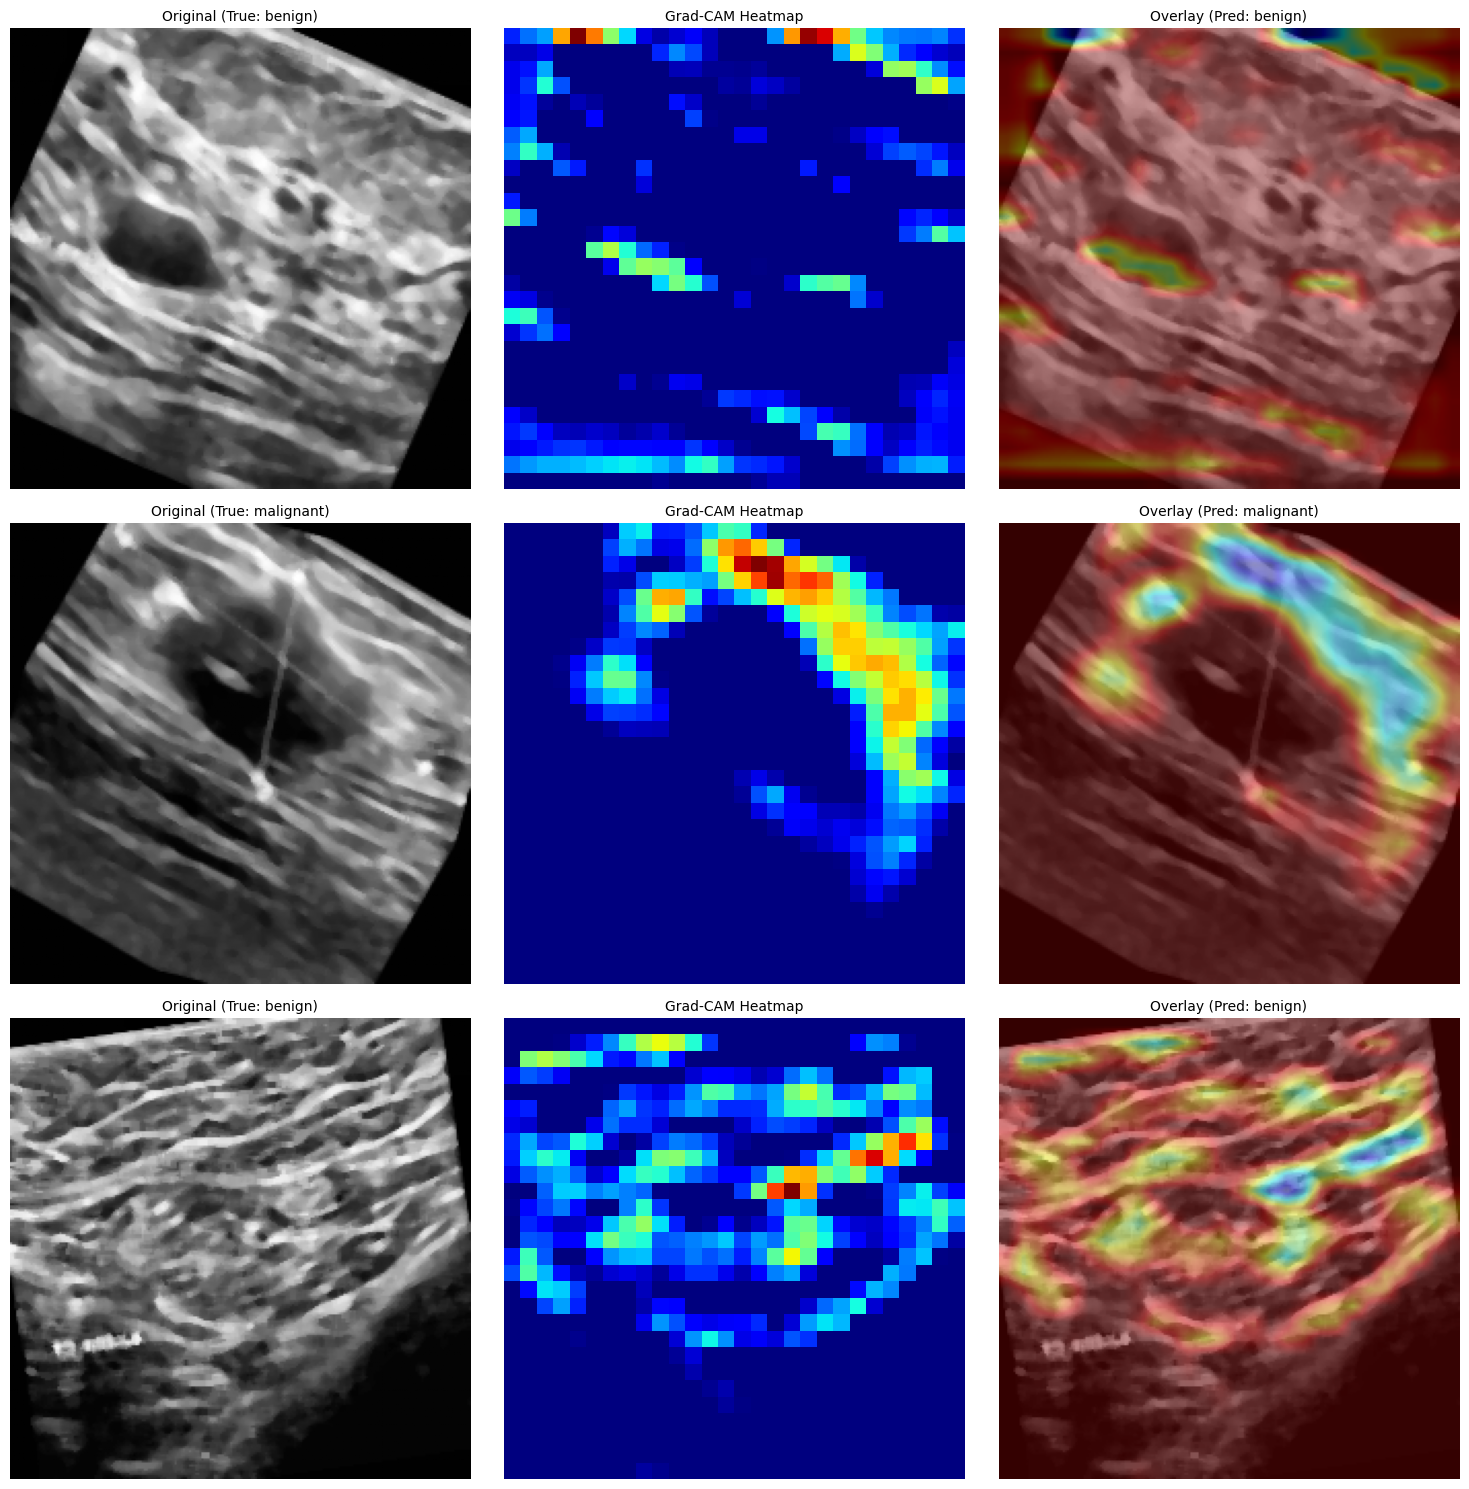

Grad-CAM visualization complete.


In [ ]:
def visualize_grad_cam(model, target_layer_name, dataset, global_label_map, sample_idx=None, num_samples=1, class_idx=None):
    grad_cam = GradCAM(model, target_layer_name)

    fig, axes = plt.subplots(num_samples, 3, figsize=(15, 5 * num_samples))
    if num_samples == 1: # Handle single row subplot case
        axes = axes.reshape(1, -1)

    for i in range(num_samples):
        if sample_idx is None:
            current_sample_idx = random.randint(0, len(dataset) - 1)
        else:
            current_sample_idx = sample_idx

        input_tensor, true_label = dataset[current_sample_idx]

        # If input_tensor or true_label is None (due to corrupted image), skip
        if input_tensor is None:
            print(f"Skipping sample {current_sample_idx} due to corrupted image.")
            i -= 1 # Try another sample if this one was skipped
            if i < 0: i = 0 # Prevent negative index
            continue

        # Move input tensor to device and add batch dimension
        input_tensor_batch = input_tensor.unsqueeze(0).to(device)

        # Get the original image (numpy array before normalization/tensor conversion)
        # Reverse preprocessing for display: denormalize and convert to uint8
        # Assuming mean=0.5, std=0.5 for normalization to [-1, 1]
        img_np_processed = input_tensor.squeeze(0).cpu().numpy()
        img_np_original_scale = ((img_np_processed * 0.5) + 0.5) * 255
        img_np_original_scale = img_np_original_scale.astype(np.uint8)

        # Generate heatmap
        heatmap = grad_cam.generate_heatmap(input_tensor_batch, class_idx=class_idx)

        # Overlay heatmap on original image
        superimposed_img = grad_cam.overlay_heatmap(img_np_original_scale, heatmap)

        # Get predicted label
        with torch.no_grad():
            output = model(input_tensor_batch)
            predicted_label = output.argmax(dim=1).item()

        true_label_name = list(global_label_map.keys())[list(global_label_map.values()).index(true_label)]
        predicted_label_name = list(global_label_map.keys())[list(global_label_map.values()).index(predicted_label)]

        axes[i, 0].imshow(img_np_original_scale, cmap='gray')
        axes[i, 0].set_title(f"Original (True: {true_label_name})", fontsize=10)
        axes[i, 0].axis('off')

        axes[i, 1].imshow(heatmap, cmap='jet')
        axes[i, 1].set_title("Grad-CAM Heatmap", fontsize=10)
        axes[i, 1].axis('off')

        axes[i, 2].imshow(superimposed_img)
        axes[i, 2].set_title(f"Overlay (Pred: {predicted_label_name})", fontsize=10)
        axes[i, 2].axis('off')

    plt.tight_layout()
    plt.show()
    print("Grad-CAM visualization complete.")

# --- Visualize a few samples ---
print("\n--- Generating Grad-CAM visualizations for sample images ---")
target_layer = 'cnn_backbone.features.10' # The last Conv2d layer before MaxPool in CNNBackbone

# Visualize 3 random samples from the validation set
visualize_grad_cam(model_for_gradcam, target_layer, val_dataset, full_dataset.label_map, num_samples=3)


## Summary:

### Data Analysis Key Findings
*   All necessary libraries for Grad-CAM implementation, including PyTorch modules, image manipulation tools, and visualization libraries, were successfully imported.
*   A `GradCAM` class was successfully defined, incorporating logic for capturing feature maps and gradients, generating heatmaps, and overlaying them onto images. Hooks were registered to the `cnn_backbone.features.10` layer of the model.
*   The `HybridCNNViT` model was successfully instantiated with the correct number of classes (derived from `full_dataset.label_map`), and its pre-trained state dictionary was loaded from `hybrid_cnn_vit_model_epoch_10.pth` onto the CPU device.
*   Grad-CAM visualizations were successfully generated and displayed for 3 random samples from the validation set. This was achieved after resolving an `AttributeError` by passing the `full_dataset.label_map` as a `global_label_map` to the visualization function, enabling correct label name mapping.

### Insights or Next Steps
*   The successful implementation of Grad-CAM for the hybrid model provides a powerful tool for interpreting its decision-making process, allowing for visual identification of image regions most influential to the model's predictions.
*   Leverage this Grad-CAM implementation to analyze specific cases, such as images with incorrect predictions, to gain insights into potential biases or areas of improvement for the model's training or architecture.


## Import LIME Libraries
## AI is used for better understanding about implementing LIME


In [ ]:
import sys
!{sys.executable} -m pip install lime

print("LIME library installed.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=e743be427e4dddd25e5d02349fdf07a03f0755731e550c4ac72cb03cb59572e5
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime
LIME library installed.


## Generating and Visualize LIME Explanations


--- Generating LIME visualizations for sample images ---
Generating LIME explanations for 3 samples...


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

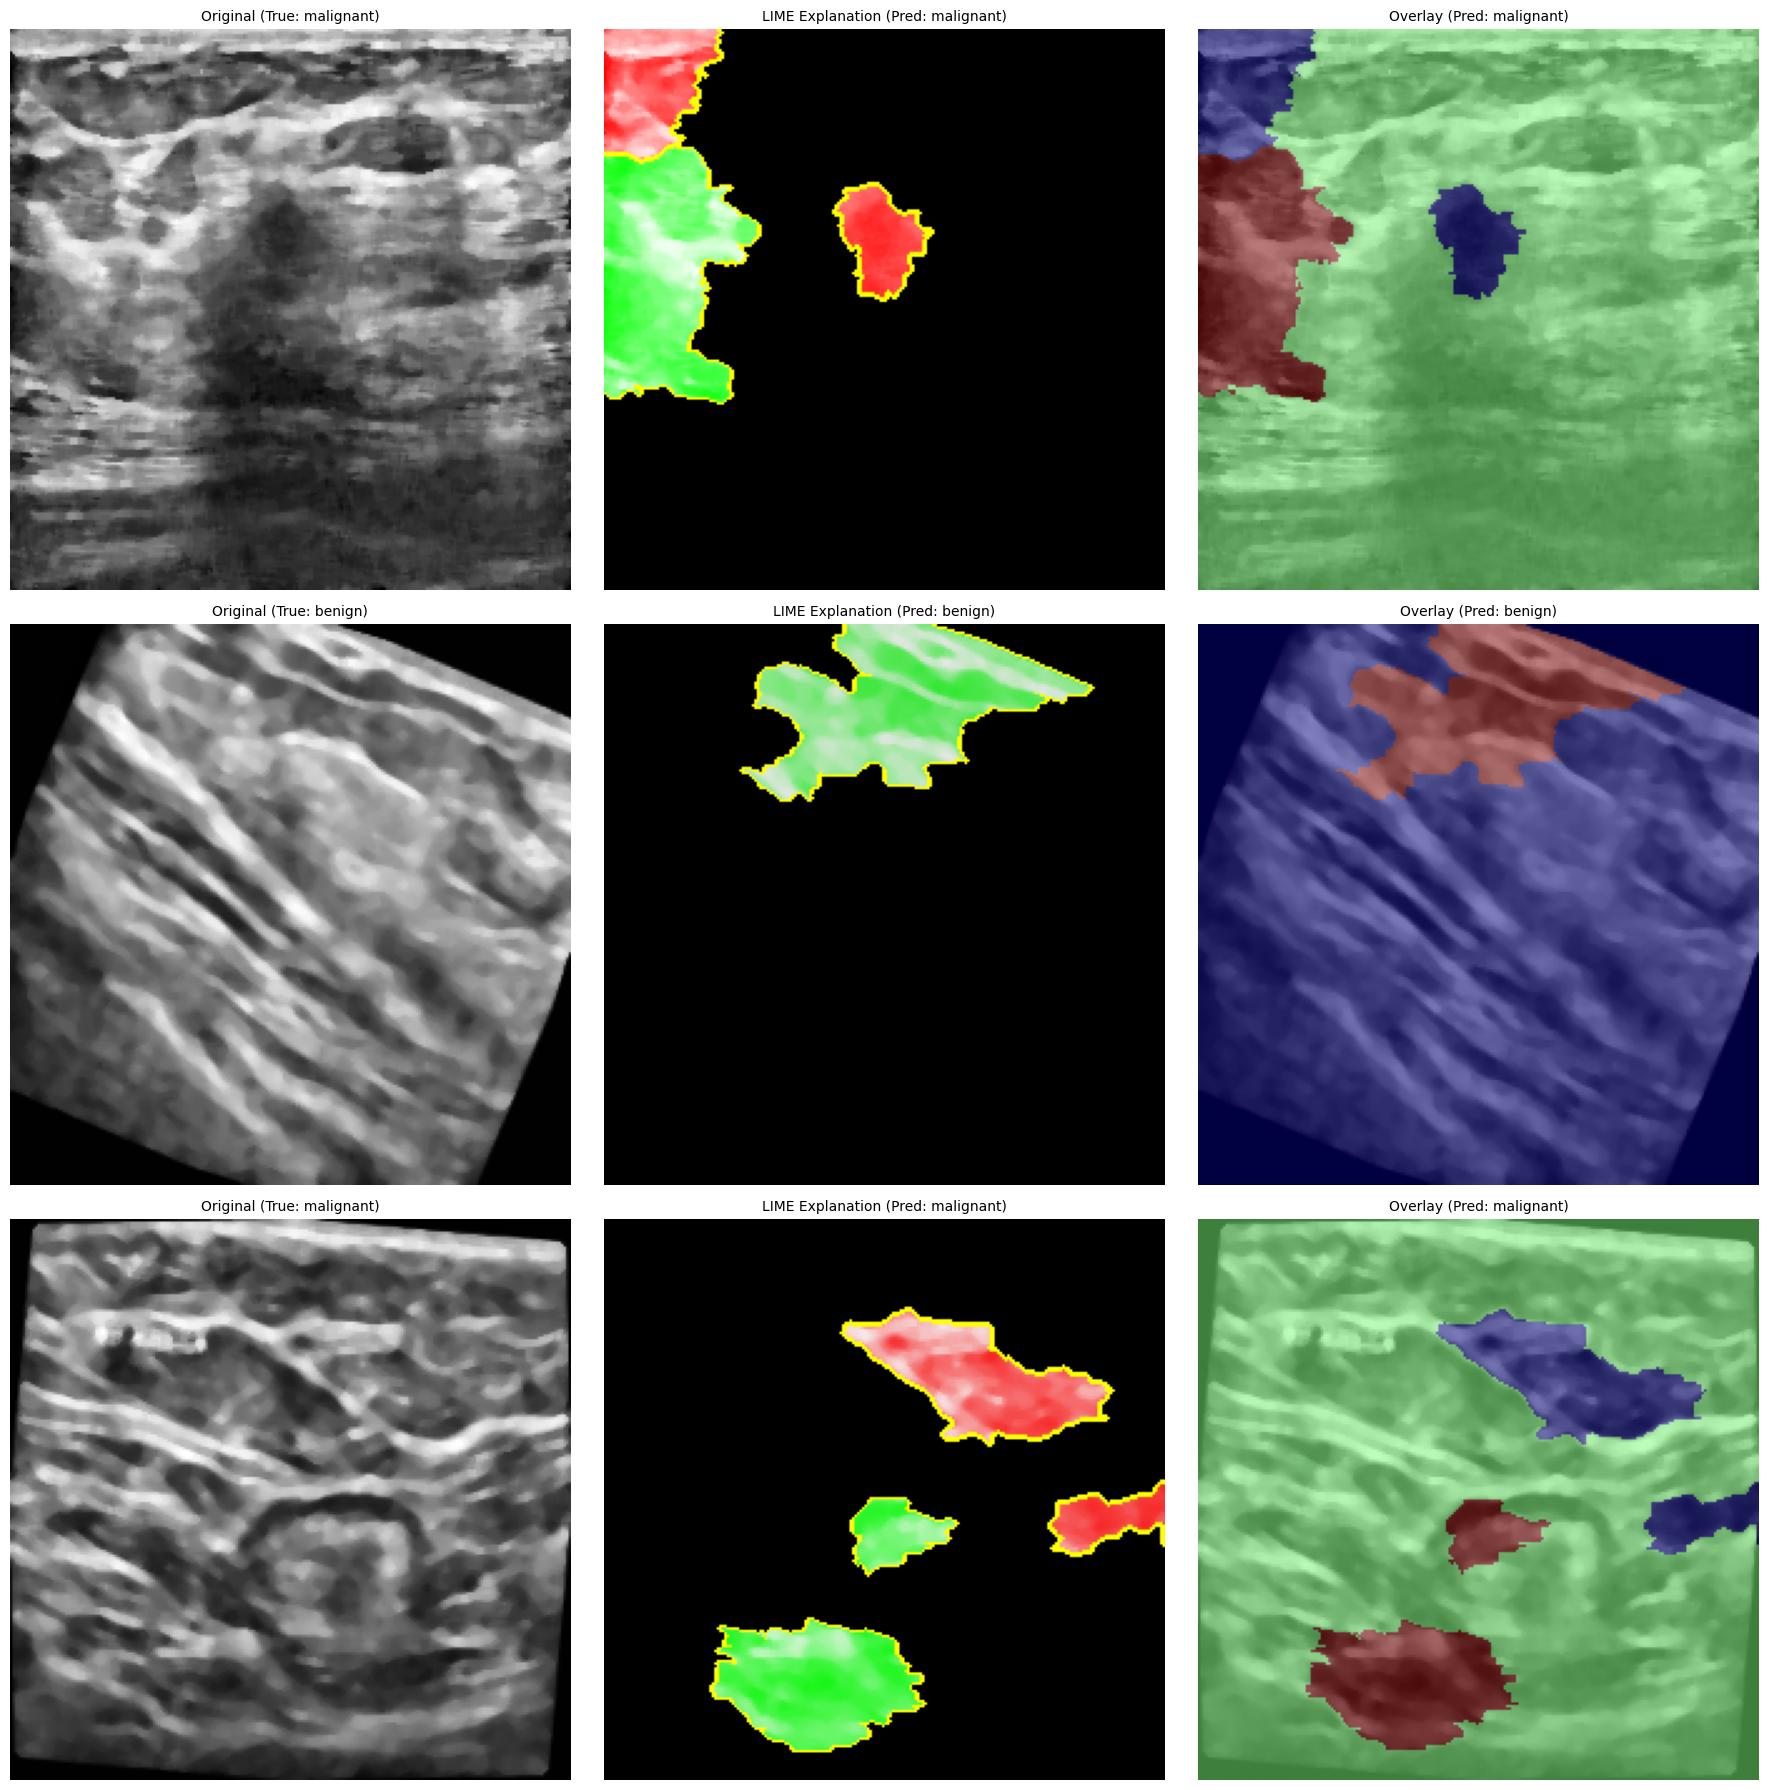

LIME visualization complete.


In [ ]:
def visualize_lime(model, explainer, dataset, global_label_map, prediction_function, num_samples=3, hide_colors=False, num_features=5, top_labels=3, positive_only=False, negative_only=False):
    fig, axes = plt.subplots(num_samples, 3, figsize=(18, 6 * num_samples))
    if num_samples == 1: # Handle single row subplot case
        axes = axes.reshape(1, -1)

    print(f"Generating LIME explanations for {num_samples} samples...")

    for i in range(num_samples):
        sample_idx = random.randint(0, len(dataset) - 1)
        input_tensor, true_label = dataset[sample_idx]

        if input_tensor is None:
            print(f"Skipping sample {sample_idx} due to corrupted image.")
            i -= 1
            if i < 0: i = 0
            continue

        # Original image for LIME explainer (numpy array, 0-255, 3-channel)
        # Reverse normalization and convert to 0-255 scale
        img_for_lime_tensor = ((input_tensor.squeeze(0).cpu() * 0.5) + 0.5) # Scale back to [0, 1]
        img_for_lime_np = (img_for_lime_tensor.numpy() * 255).astype(np.uint8)
        img_for_lime_rgb = cv2.cvtColor(img_for_lime_np, cv2.COLOR_GRAY2RGB) # LIME expects 3 channels

        # Get predicted label
        input_tensor_batch = input_tensor.unsqueeze(0).to(device)
        with torch.no_grad():
            output = model(input_tensor_batch)
            predicted_label = output.argmax(dim=1).item()

        true_label_name = list(global_label_map.keys())[list(global_label_map.values()).index(true_label)]
        predicted_label_name = list(global_label_map.keys())[list(global_label_map.values()).index(predicted_label)]

        # Generate LIME explanation
        explanation = explainer.explain_instance(
            img_for_lime_rgb, # LIME takes 3-channel image
            prediction_function,
            top_labels=top_labels,
            hide_color=hide_colors,
            num_samples=1000 # Number of perturbations
        )

        # Get image and mask for the predicted class
        temp, mask = explanation.get_image_and_mask(
            explanation.top_labels[0],
            positive_only=positive_only,
            negative_only=negative_only,
            num_features=num_features,
            hide_rest=True # Hide other parts of the image
        )

        # Ensure 'temp' is in [0, 1] range for mark_boundaries and imshow
        # LIME's get_image_and_mask with hide_rest=True often returns temp in [-1, 1] or [0, 255] float.
        # To consistently pass [0, 1] float to mark_boundaries:
        if np.max(temp) > 1.0 or np.min(temp) < 0.0:
            # If temp is effectively in a 0-255 range (common when input is uint8):
            temp_scaled = temp / 255.0
        else:
            # If temp is effectively in [-1, 1] range:
            temp_scaled = temp / 2 + 0.5


        # Original image for display (processed and grayscale)
        img_display = img_for_lime_np

        # Plotting
        axes[i, 0].imshow(img_display, cmap='gray')
        axes[i, 0].set_title(f"Original (True: {true_label_name})", fontsize=10)
        axes[i, 0].axis('off')

        axes[i, 1].imshow(mark_boundaries(temp_scaled, mask)) # Use temp_scaled
        axes[i, 1].set_title(f"LIME Explanation (Pred: {predicted_label_name})", fontsize=10)
        axes[i, 1].axis('off')

        # Overlay explanation on original image for third plot
        axes[i, 2].imshow(img_display, cmap='gray')
        axes[i, 2].imshow(mask, cmap='jet', alpha=0.5)
        axes[i, 2].set_title(f"Overlay (Pred: {predicted_label_name})", fontsize=10)
        axes[i, 2].axis('off')

    plt.tight_layout()
    plt.show()
    print("LIME visualization complete.")


# --- Visualize a few samples ---
print("\n--- Generating LIME visualizations for sample images ---")
visualize_lime(hybrid_model, explainer, val_dataset, full_dataset.label_map, prediction_function, num_samples=3)
